Probability and random variables are an integral part of computation in a graph-computing platform like PyTorch. Understanding probability and the associated concepts are essential. This chapter covers probability distributions and implementation using PyTorch, as well as how to interpret the results of a test. In probability and statistics, a random variable is also known as a stochastic variable, whose outcome is dependent on a purely stochastic phenomenon, or random phenomenon. There are different types of probability distribution, including normal distribution, binomial distribution, multinomial distribution, and the Bernoulli distribution. Each statistical distribution has its own properties.

# Recipe 3-1. Setting Up a Loss Function Problem

How do we set up a loss function and optimize it? Choosing the right loss function increases the chances of model convergence.

## Solution

In this recipe, we use another tensor as the update variable, and introduce the tensors to the sample model and compute the error or loss. Then we compute the rate of change in the loss function to measure the choice of loss function in model convergence.

## How It Works

In the following example, t_c and t_u are two tensors. This can be constructed from any NumPy array.

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
torch.tensor

<function torch._VariableFunctionsClass.tensor>

In [ ]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

The sample model is just a linear equation to make the calculation happen and the loss function defined if the mean square error (MSE) shown next. Going forward in this chapter, we will increase the complexity of the model. For now, this is just a simple linear equation computation.

In [ ]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [ ]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

Let’s now define the model. The w parameter is the weight tensor, which is multiplied with the t_u tensor. The result is added with a constant tensor, b, and the loss function chosen is a custom-built one; it is also available in PyTorch. In the following example, t_u is the tensor used, t_p is the tensor predicted, and t_c is the precomputed tensor, with which the predicted tensor needs to be compared to calculate the loss function.

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

The formula w * t_u + b is the linear equation representation of a tensor-based computation.

In [ ]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

The initial loss value is 1763.88, which is too high because of the initial round of weights chosen. The error in the first round of iteration is backpropagated to reduce the errors in the second round, for which the initial set of weights needs to be updated. Therefore, the rate of change in the loss function is essential in updating the weights in the estimation process.

This code calculates an approximation of the gradient of the loss function with respect to the weight w using the finite difference method. The gradient is the rate of change of the loss function with respect to the model parameters, and it is used to update their values in optimization algorithms such as gradient descent. In this code, the value of delta determines the step size used in the approximation, and is set to 0.1. The rate of change is calculated by taking the difference between the loss function evaluated at w + delta and w - delta, and then dividing by 2.0 * delta. This gives an approximation of the derivative of the loss function with respect to w.

In [ ]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [ ]:
loss_fn(model(t_u, w, b), t_c)

tensor(1763.8848)

In [ ]:
loss_rate_of_change_w

tensor(4517.2974)

In [ ]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [ ]:
w

tensor([-44.1730])

There are two parameters to update the rate of loss function: the learning rate at the current iteration and the learning rate at the previous iteration. If the delta between the two iterations exceeds a certain threshold, then the weight tensor needs to be updated, else model convergence could happen. The preceding script shows the delta and learning rate values. Currently, these are static values that the user has the option to change.

In [ ]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [ ]:
loss_rate_of_change_w

tensor(-261170.)

In [ ]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [ ]:
loss_rate_of_change_b = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [ ]:
b

tensor([-151244.7969])

In [ ]:
loss_fn(model(t_u, w, b), t_c)

tensor(2.0305e+09)

This is how a simple mean square loss function works in a two-dimensional tensor example, with a tensor size of 10,5. Let’s look at the following example. The MSELoss function is within the neural network module of PyTorch.

In [ ]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()

In [ ]:
output

tensor(2.2558, grad_fn=<MseLossBackward0>)

When we look at the gradient calculation that is used for backpropagation, it is shown as MSELoss.

In [ ]:
output.grad_fn

# Recipe 3-2. Estimating the Derivative of the Loss Function Problem

How do we estimate the derivative of a loss function?

## Solution

Using the following example, we change the loss function to two times the differences between the input and the output tensors, instead of MSELoss function. The following grad_fn, which is defined as a custom function, shows the user how the final output retrieves the derivative of the loss function

## How It Works

Let’s look at the following example. In the previous recipe, the last line of the script shows the grad_fn as an object embedded in the output object tensor. In this recipe, we explain how this is computed. grad_fn is a derivative of the loss function with respect to the parameters of the model. This is exactly what we do in the following grad_fn.

In [ ]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c)
  return dsq_diffs

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

In [ ]:
def dmodel_dw(t_u, w, b):
  return t_u

In [ ]:
def dmodel_db(t_u, w, b):
  return 1.0

In [ ]:
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
  dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.mean(), dloss_db.mean()])

The parameters are the input, bias settings, and the learning rate, and the number of epochs for the model training. The estimation of these parameters provides values to the equation.

In [ ]:
params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-2

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_u, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 1763.884766
Params:  tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1, Loss 5802484.500000
Params:  tensor([-44.1730,  -0.8260])
Grad:  tensor([-261257.4062,   -4598.9707])
Epoch 2, Loss 19408029696.000000
Params:  tensor([2568.4011,   45.1637])
Grad:  tensor([15109613.0000,   266155.6875])
Epoch 3, Loss 64915893125120.000000
Params:  tensor([-148527.7188,   -2616.3931])
Grad:  tensor([-8.7385e+08, -1.5393e+07])
Epoch 4, Loss 217130405201969152.000000
Params:  tensor([8589997.0000,  151310.8594])
Grad:  tensor([5.0539e+10, 8.9023e+08])
Epoch 5, Loss 726257090571718885376.000000
Params:  tensor([-4.9680e+08, -8.7510e+06])
Grad:  tensor([-2.9229e+12, -5.1486e+10])
Epoch 6, Loss 2429182551776534441492480.000000
Params:  tensor([2.8732e+10, 5.0610e+08])
Grad:  tensor([1.6904e+14, 2.9776e+12])
Epoch 7, Loss 8125120778724300355933306880.000000
Params:  tensor([-1.6617e+12, -2.9270e+10])
Grad:  tensor([-9.7764e+15, -1.7221e+14])
Epoch 8, Loss 2717686519588111602212

This is what the initial result looks like. Epoch is an iteration that produces a loss value from the loss function defined earlier. The params vector is about coefficients and constants that need to be changed to minimize the loss function. The grad function computes the feedback value to the next epoch. This is just an example. The number of epochs chosen is an iterative task depending on the input data, output data, and choice of loss and optimization functions.


In [ ]:
params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-4

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_u, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 1763.884766
Params:  tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1, Loss 323.090515
Params:  tensor([ 0.5483, -0.0083])
Grad:  tensor([1859.5492,   35.7843])
Epoch 2, Loss 78.929634
Params:  tensor([ 0.3623, -0.0118])
Grad:  tensor([765.4666,  16.5122])
Epoch 3, Loss 37.552845
Params:  tensor([ 0.2858, -0.0135])
Grad:  tensor([315.0790,   8.5787])
Epoch 4, Loss 30.540283
Params:  tensor([ 0.2543, -0.0143])
Grad:  tensor([129.6733,   5.3127])
Epoch 5, Loss 29.351154
Params:  tensor([ 0.2413, -0.0149])
Grad:  tensor([53.3496,  3.9682])
Epoch 6, Loss 29.148884
Params:  tensor([ 0.2360, -0.0153])
Grad:  tensor([21.9304,  3.4148])
Epoch 7, Loss 29.113848
Params:  tensor([ 0.2338, -0.0156])
Grad:  tensor([8.9965, 3.1869])
Epoch 8, Loss 29.107145
Params:  tensor([ 0.2329, -0.0159])
Grad:  tensor([3.6721, 3.0930])
Epoch 9, Loss 29.105247
Params:  tensor([ 0.2325, -0.0162])
Grad:  tensor([1.4803, 3.0544])
Epoch 10, Loss 29.104168
Params:  tensor([ 0.2324, -0.0166]

If we reduce the learning rate, we are able to pass relevant values to the gradient, the parameter updates in a better way, and model convergence becomes quicker.The initial results look like as the following. The results are at epoch 5 and the loss value is 29.35, which is much lower than 1763.88 at epoch 0, and corresponding to the epoch, the estimated parameters are 0.24 and –.01, at epoch 100. These parameter values are optimal.

In [ ]:
t_un = 0.1 * t_u

params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-4

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_un, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 80.364342
Params:  tensor([1., 0.])
Grad:  tensor([-776.1404,  -10.6400])
Epoch 1, Loss 74.507080
Params:  tensor([1.0776e+00, 1.0640e-03])
Grad:  tensor([-730.3806,   -9.8338])
Epoch 2, Loss 69.320488
Params:  tensor([1.1507, 0.0020])
Grad:  tensor([-687.3207,   -9.0751])
Epoch 3, Loss 64.727730
Params:  tensor([1.2194, 0.0030])
Grad:  tensor([-646.8013,   -8.3613])
Epoch 4, Loss 60.660805
Params:  tensor([1.2841, 0.0038])
Grad:  tensor([-608.6725,   -7.6895])
Epoch 5, Loss 57.059509
Params:  tensor([1.3449, 0.0046])
Grad:  tensor([-572.7932,   -7.0574])
Epoch 6, Loss 53.870518
Params:  tensor([1.4022, 0.0053])
Grad:  tensor([-539.0307,   -6.4626])
Epoch 7, Loss 51.046604
Params:  tensor([1.4561, 0.0059])
Grad:  tensor([-507.2600,   -5.9028])
Epoch 8, Loss 48.545971
Params:  tensor([1.5068, 0.0065])
Grad:  tensor([-477.3639,   -5.3761])
Epoch 9, Loss 46.331593
Params:  tensor([1.5546, 0.0070])
Grad:  tensor([-449.2315,   -4.8805])
Epoch 10, Loss 44.370693
Params:  tensor

If we increase the number of epochs, then what happens to the loss function and parameter tensor can be viewed in the following script, in which we print the loss value to find the minimum loss corresponding to the epoch. Then we can extract the best parameters from the model.

In [ ]:
t_un = 0.1 * t_u

params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-3

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_un, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 80.364342
Params:  tensor([1., 0.])
Grad:  tensor([-776.1404,  -10.6400])
Epoch 1, Loss 37.812603
Params:  tensor([1.7761, 0.0106])
Grad:  tensor([-318.5435,   -2.5779])
Epoch 2, Loss 30.651495
Params:  tensor([2.0947, 0.0132])
Grad:  tensor([-130.9219,    0.7274])
Epoch 3, Loss 29.439991
Params:  tensor([2.2256, 0.0125])
Grad:  tensor([-53.9943,   2.0823])
Epoch 4, Loss 29.228697
Params:  tensor([2.2796, 0.0104])
Grad:  tensor([-22.4527,   2.6375])
Epoch 5, Loss 29.185547
Params:  tensor([2.3021, 0.0078])
Grad:  tensor([-9.5201,  2.8648])
Epoch 6, Loss 29.170666
Params:  tensor([2.3116, 0.0049])
Grad:  tensor([-4.2176,  2.9577])
Epoch 7, Loss 29.160545
Params:  tensor([2.3158e+00, 1.9483e-03])
Grad:  tensor([-2.0434,  2.9955])
Epoch 8, Loss 29.151220
Params:  tensor([ 2.3178e+00, -1.0472e-03])
Grad:  tensor([-1.1519,  3.0107])
Epoch 9, Loss 29.142031
Params:  tensor([ 2.3190, -0.0041])
Grad:  tensor([-0.7863,  3.0166])
Epoch 10, Loss 29.132875
Params:  tensor([ 2.3198, -

The initial results look like as the following. The results are at epoch 5 and the loss value is 29.35, which is much lower than 1763.88 at epoch 0, and corresponding to the epoch, the estimated parameters are 0.24 and –.01, at epoch 100. These parameter values are optimal.

If we reduce the learning rate a bit, then the process of weight updating will be a little slower, which means that the epoch number needs to be increased in order to find a stable state for the model.

In [ ]:
t_un = 0.1 * t_u

params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-2

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_un, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 80.364342
Params:  tensor([1., 0.])
Grad:  tensor([-776.1404,  -10.6400])
Epoch 1, Loss 1256.924072
Params:  tensor([8.7614, 0.1064])
Grad:  tensor([3799.8271,   69.9809])
Epoch 2, Loss 29506.507812
Params:  tensor([-29.2369,  -0.5934])
Grad:  tensor([-18621.7266,   -325.0808])
Epoch 3, Loss 707739.937500
Params:  tensor([156.9804,   2.6574])
Grad:  tensor([91240.5391,  1610.6317])
Epoch 4, Loss 16991132.000000
Params:  tensor([-755.4250,  -13.4489])
Grad:  tensor([-447068.0312,   -7874.1011])
Epoch 5, Loss 407931296.000000
Params:  tensor([3715.2551,   65.2921])
Grad:  tensor([2190563.0000,   38599.6289])
Epoch 6, Loss 9793826816.000000
Params:  tensor([-18190.3730,   -320.7042])
Grad:  tensor([-10733432.0000,   -189114.6875])
Epoch 7, Loss 235135369216.000000
Params:  tensor([89143.9453,  1570.4426])
Grad:  tensor([52592208.0000,   926651.2500])
Epoch 8, Loss 5645255311360.000000
Params:  tensor([-436778.1250,   -7696.0703])
Grad:  tensor([-2.5769e+08, -4.5404e+06])
Epo

To fine-tune this model in estimating parameters, we can redefine the model and the loss function and apply it to the same example.

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

In [ ]:
t_un = 0.1 * t_u

params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-3

for epoch in range(nepochs):
  # forward pass
  w, b = params
  t_p = model(t_un, w, b)

  loss = loss_fn(t_p, t_c)
  print("Epoch %d, Loss %f" % (epoch, float(loss)))

  # backward pass
  grad = grad_fn(t_u, t_c, t_p, w, b)

  print("Params: ", params)
  print("Grad: ", grad)

  params = params - learning_rate * grad

Epoch 0, Loss 80.364342
Params:  tensor([1., 0.])
Grad:  tensor([-776.1404,  -10.6400])
Epoch 1, Loss 37.812603
Params:  tensor([1.7761, 0.0106])
Grad:  tensor([-318.5435,   -2.5779])
Epoch 2, Loss 30.651495
Params:  tensor([2.0947, 0.0132])
Grad:  tensor([-130.9219,    0.7274])
Epoch 3, Loss 29.439991
Params:  tensor([2.2256, 0.0125])
Grad:  tensor([-53.9943,   2.0823])
Epoch 4, Loss 29.228697
Params:  tensor([2.2796, 0.0104])
Grad:  tensor([-22.4527,   2.6375])
Epoch 5, Loss 29.185547
Params:  tensor([2.3021, 0.0078])
Grad:  tensor([-9.5201,  2.8648])
Epoch 6, Loss 29.170666
Params:  tensor([2.3116, 0.0049])
Grad:  tensor([-4.2176,  2.9577])
Epoch 7, Loss 29.160545
Params:  tensor([2.3158e+00, 1.9483e-03])
Grad:  tensor([-2.0434,  2.9955])
Epoch 8, Loss 29.151220
Params:  tensor([ 2.3178e+00, -1.0472e-03])
Grad:  tensor([-1.1519,  3.0107])
Epoch 9, Loss 29.142031
Params:  tensor([ 2.3190, -0.0041])
Grad:  tensor([-0.7863,  3.0166])
Epoch 10, Loss 29.132875
Params:  tensor([ 2.3198, -

Set up the parameters. After completing the training process, we should reset the grad function to None.

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)

In [ ]:
params.grad is None

True

# Recipe 3-3. Fine-Tuning a Model Problem

How do we find the gradients of the loss function by applying an optimization function to optimize the loss function?

## Solution

We’ll use the backward() function.

## How It Works

Let’s look at the following example. The backward() function calculates the gradients of a function with respect to its parameters. In this section, we retrain the model with new set of hyperparameters.

In [ ]:
loss.backward()

In [ ]:
params.grad

tensor([4517.2969,   82.6000])

Reset the parameter grid. If we do not reset the parameters in an existing session, the error values accumulated from any other session become mixed, so it is important to reset the parameter grid.

In [ ]:
if params.grad is not None:
  params.grad.zero_()

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

After redefining the model and the loss function, let’s retrain the model.

In [ ]:
t_un = 0.1 * t_u

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000

learning_rate = 1e-2

for epoch in range(nepochs):
  # forward pass
  t_p = model(t_un, *params)
  loss = loss_fn(t_p, t_c)

  print("Epoch %d, Loss %s" % (epoch, float(loss)))

  # backward pass
  if params.grad is not None:
    params.grad.zero_()

  loss.backward()

  # params.grad.clamp_(-1.0, 1.0)
  # print(params, params.grad)

  params = (params - learning_rate * params.grad).detach().requires_grad_()

Epoch 0, Loss 80.36434173583984
Epoch 1, Loss 37.574913024902344
Epoch 2, Loss 30.871076583862305
Epoch 3, Loss 29.756193161010742
Epoch 4, Loss 29.507152557373047
Epoch 5, Loss 29.3924560546875
Epoch 6, Loss 29.298828125
Epoch 7, Loss 29.208717346191406
Epoch 8, Loss 29.119415283203125
Epoch 9, Loss 29.030488967895508
Epoch 10, Loss 28.941877365112305
Epoch 11, Loss 28.853565216064453
Epoch 12, Loss 28.765552520751953
Epoch 13, Loss 28.6778507232666
Epoch 14, Loss 28.590431213378906
Epoch 15, Loss 28.503318786621094
Epoch 16, Loss 28.4164981842041
Epoch 17, Loss 28.329973220825195
Epoch 18, Loss 28.243741989135742
Epoch 19, Loss 28.157804489135742
Epoch 20, Loss 28.07215118408203
Epoch 21, Loss 27.986797332763672
Epoch 22, Loss 27.9017276763916
Epoch 23, Loss 27.81694984436035
Epoch 24, Loss 27.732463836669922
Epoch 25, Loss 27.648256301879883
Epoch 26, Loss 27.56434440612793
Epoch 27, Loss 27.4807071685791
Epoch 28, Loss 27.397361755371094
Epoch 29, Loss 27.314294815063477
Epoch 30, 

We have taken 5000 epochs. We train the parameters in a backward propagation method and get the following results. At epoch 0, the loss value is 80.36. We try to minimize the loss value as we proceed with the next iteration by adjusting the learning rate. At the final epoch, we observe that the loss value is 2.92, which is same result as before but with a different loss function and using backpropagation.

In [ ]:
params

tensor([  5.3671, -17.3012], requires_grad=True)

The final model parameters are 5.3671 with a bias of –17.3012.

## Exercise

In [ ]:
import torch

t_u = torch.randn(4,4)
t_c = torch.randn(4,4)

params = torch.tensor([0.777, 0.0], requires_grad=True)


nepochs = 100
learning_rate = 10e-2

def model(t_u, *params):
  w, b = params
  return w * t_u + b

def loss_fn(t_p, t_c): # MSE
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

for epoch in range(nepochs):
  # forward
  t_p = model(t_u, *params)
  loss = loss_fn(t_p, t_c)

  if params.grad is not None:
    params.grad.zero_()

  print(f"Epoch: {epoch}, Loss: {float(loss)}")

  # backward
  loss.backward()

  params = (params - learning_rate * params.grad).detach().requires_grad_()

Epoch: 0, Loss: 1.2907612323760986
Epoch: 1, Loss: 0.9859358072280884
Epoch: 2, Loss: 0.835127592086792
Epoch: 3, Loss: 0.7547728419303894
Epoch: 4, Loss: 0.7082972526550293
Epoch: 5, Loss: 0.6792511940002441
Epoch: 6, Loss: 0.6599177718162537
Epoch: 7, Loss: 0.6464537382125854
Epoch: 8, Loss: 0.6367953419685364
Epoch: 9, Loss: 0.6297392249107361
Epoch: 10, Loss: 0.6245281100273132
Epoch: 11, Loss: 0.6206554770469666
Epoch: 12, Loss: 0.6177671551704407
Epoch: 13, Loss: 0.6156085729598999
Epoch: 14, Loss: 0.6139934659004211
Epoch: 15, Loss: 0.6127843260765076
Epoch: 16, Loss: 0.6118786334991455
Epoch: 17, Loss: 0.611200213432312
Epoch: 18, Loss: 0.6106919646263123
Epoch: 19, Loss: 0.6103110909461975
Epoch: 20, Loss: 0.6100257635116577
Epoch: 21, Loss: 0.6098119616508484
Epoch: 22, Loss: 0.6096518039703369
Epoch: 23, Loss: 0.6095317006111145
Epoch: 24, Loss: 0.6094418168067932
Epoch: 25, Loss: 0.6093744039535522
Epoch: 26, Loss: 0.6093238592147827
Epoch: 27, Loss: 0.6092860698699951
Epoc

In [ ]:
t_u

tensor([[-2.4095,  0.3100, -0.5314, -2.4845],
        [ 0.4624, -0.6504, -0.2708, -0.8843],
        [-0.9812, -0.8277, -1.9388,  0.7044],
        [ 1.5002,  0.6340,  0.0655, -0.6717]])

In [ ]:
t_c

tensor([[-0.3987,  0.5538, -0.1142, -0.2035],
        [-0.5297,  0.2116, -0.6035,  0.1105],
        [-1.5624,  0.2546, -1.3364, -1.9736],
        [-0.2408, -0.2804,  0.5532,  1.0775]])

# Recipe 3-4. Selecting an Optimization Function Problem

How do we optimize the gradients with the function in Recipe 3-3?

## Solution

There are certain functions that are embedded in PyTorch, and there are certain optimization functions that the user has to create.

## How It Works

Let’s look at the following example.

In [ ]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

Each optimization method is unique in solving a problem. We will describe it later.

The Adam optimizer is a first-order, gradient-based optimization of stochastic objective functions. It is based on adaptive estimation of lower-order moments. This is computationally efficient enough for deployment on large datasets. To use torch.optim, we have to construct an optimizer object in our code that will hold the current state of the parameters and will update the parameters based on the computed gradients, moments, and learning rate. To construct an optimizer, we have to give it an iterable containing the parameters and ensure that all the parameters are variables to optimize. Then, we can specify optimizer-specific options, such as the learning rate, weight decay, moments, and so forth.

Adadelta is another optimizer that is fast enough to work on large datasets. This method does not require manual fine-tuning of the learning rate; the algorithm takes care of it internally.


In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([0.9748, 0.0044], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([0.9748, 0.0044], requires_grad=True)

Now let’s call the model and loss function out once again and apply them along with the optimization function.

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):  # MSE
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

for epoch in range(nepochs):
  # forward pass
  t_p = model(t_u, *params)
  loss = loss_fn(t_p, t_c)

  print(f"Epoch: {epoch}, Loss: {float(loss)}")

  # backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.7177718877792358
Epoch: 1, Loss: 1.6572767496109009
Epoch: 2, Loss: 1.6005297899246216
Epoch: 3, Loss: 1.5472841262817383
Epoch: 4, Loss: 1.4973088502883911
Epoch: 5, Loss: 1.450388789176941
Epoch: 6, Loss: 1.406324028968811
Epoch: 7, Loss: 1.3649275302886963
Epoch: 8, Loss: 1.3260246515274048
Epoch: 9, Loss: 1.2894535064697266
Epoch: 10, Loss: 1.2550623416900635
Epoch: 11, Loss: 1.2227100133895874
Epoch: 12, Loss: 1.1922640800476074
Epoch: 13, Loss: 1.163602590560913
Epoch: 14, Loss: 1.1366102695465088
Epoch: 15, Loss: 1.111180305480957
Epoch: 16, Loss: 1.0872128009796143
Epoch: 17, Loss: 1.0646146535873413
Epoch: 18, Loss: 1.0432987213134766
Epoch: 19, Loss: 1.0231842994689941
Epoch: 20, Loss: 1.0041953325271606
Epoch: 21, Loss: 0.9862613677978516
Epoch: 22, Loss: 0.9693162441253662
Epoch: 23, Loss: 0.9532984495162964
Epoch: 24, Loss: 0.9381503462791443
Epoch: 25, Loss: 0.9238183498382568
Epoch: 26, Loss: 0.9102519154548645
Epoch: 27, Loss: 0.8974043130874634
Epoch:

The example has two custom functions and a loss function. We have taken two small tensor values. The new thing is that we have taken the optimizer to find the minimum value.

In the following example, we have chosen Adam as the optimizer.

In [ ]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

t_u = torch.randn(4,4)
t_c = torch.randn(4,4)

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 100
learning_rate = 1e-1

optimizer = optim.Adam([params], lr=learning_rate)

for epoch in range(nepochs):
  # forward pass
  t_p = model(t_u, *params)
  loss = loss_fn(t_p, t_c)

  print(f"Epoch: {epoch}, Loss: {float(loss)}")

  # backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.4385398626327515
Epoch: 1, Loss: 1.3107821941375732
Epoch: 2, Loss: 1.2174667119979858
Epoch: 3, Loss: 1.1456090211868286
Epoch: 4, Loss: 1.0791796445846558
Epoch: 5, Loss: 1.0156114101409912
Epoch: 6, Loss: 0.9584542512893677
Epoch: 7, Loss: 0.9110350012779236
Epoch: 8, Loss: 0.8750707507133484
Epoch: 9, Loss: 0.8503708839416504
Epoch: 10, Loss: 0.8349969387054443
Epoch: 11, Loss: 0.8261896967887878
Epoch: 12, Loss: 0.8216803073883057
Epoch: 13, Loss: 0.8203222751617432
Epoch: 14, Loss: 0.8217769265174866
Epoch: 15, Loss: 0.8258587121963501
Epoch: 16, Loss: 0.8320358395576477
Epoch: 17, Loss: 0.8392619490623474
Epoch: 18, Loss: 0.8461602330207825
Epoch: 19, Loss: 0.851459264755249
Epoch: 20, Loss: 0.8544194102287292
Epoch: 21, Loss: 0.8549884557723999
Epoch: 22, Loss: 0.8536393642425537
Epoch: 23, Loss: 0.8510361909866333
Epoch: 24, Loss: 0.8477193117141724
Epoch: 25, Loss: 0.8439552187919617
Epoch: 26, Loss: 0.8397992849349976
Epoch: 27, Loss: 0.8352910280227661
Epo

In the preceding code, we computed the optimized parameters and computed the predicted tensors using the actual and predicted tensors. We can display a graph that has a line shown as a regression line.

Let’s visualize the sample data in graphical form using the actual and predicted tensors.

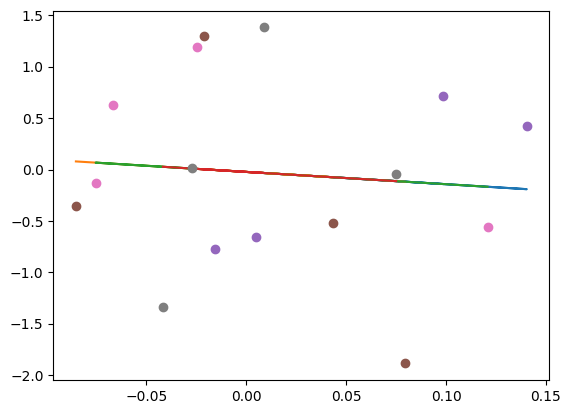

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

## Exercise

In [ ]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [ ]:
optimizers = [
    'ASGD',
    'Adadelta',
    'Adagrad',
    'Adam',
    'AdamW',
    'Adamax',
    'LBFGS',
    'NAdam',
    'RAdam',
    'RMSprop',
    'Rprop',
    'SGD',
    'SparseAdam']

optimizers_dict = {i: optimizer for i, optimizer in enumerate(optimizers)}
optimizers_dict

{0: 'ASGD',
 1: 'Adadelta',
 2: 'Adagrad',
 3: 'Adam',
 4: 'AdamW',
 5: 'Adamax',
 6: 'LBFGS',
 7: 'NAdam',
 8: 'RAdam',
 9: 'RMSprop',
 10: 'Rprop',
 11: 'SGD',
 12: 'SparseAdam'}

In [ ]:
import torch
import numpy as np
import torch.optim as optim

t_u = torch.randn(4,4)
t_c = torch.randn(4,4)

# Define initial parameters
initial_params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2
nepochs = 100

def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

# Define a list of optimizer classes
optimizers = [optim.ASGD, optim.Adadelta, optim.Adagrad, optim.Adam,
              optim.AdamW, optim.Adamax, optim.LBFGS, optim.RMSprop,
              optim.Rprop, optim.SGD]

history = np.zeros((len(optimizers), nepochs))

for i, Optimizer in enumerate(optimizers):
  # Reset parameters to initial values
  params = initial_params.clone().detach().requires_grad_(True)

  optimizer = Optimizer([params], lr=learning_rate)

  for epoch in range(nepochs):
    # forward pass
    t_p = model(t_u, *params)

    loss = loss_fn(t_p, t_c)

    if isinstance(optimizer, optim.LBFGS):
      # Define closure function
      def closure():
          optimizer.zero_grad()
          t_p = model(t_u, *params)
          loss = loss_fn(t_p, t_c)
          loss.backward()
          return loss

      # Call step method with closure function
      optimizer.step(closure)

      # Save loss value
      history[i, epoch] = closure().item()
    else:
      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      history[i, epoch] = loss.item()

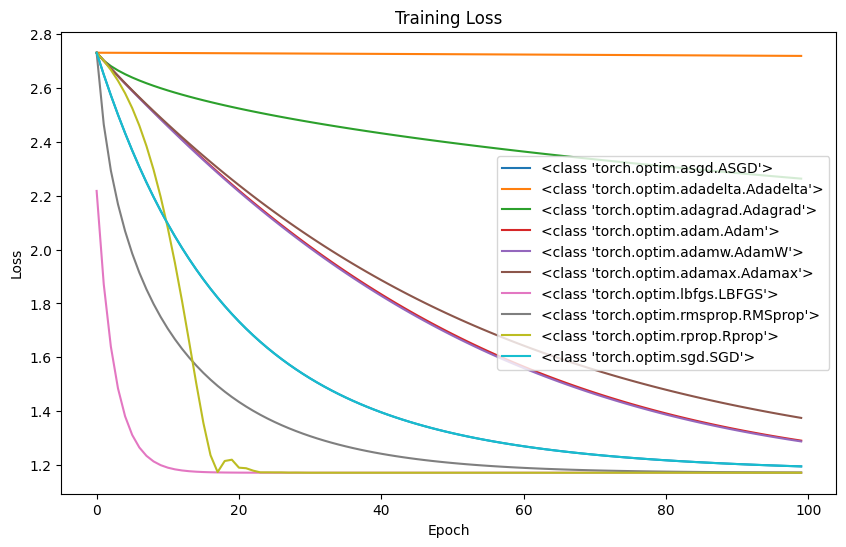

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a 2D numpy array with shape (num_optimizers, num_epochs)
num_optimizers, num_epochs = history.shape

# Assuming 'optimizers' is a list of optimizer names
assert len(optimizers) == num_optimizers

plt.figure(figsize=(10, 6))

# Plot loss values for each optimizer
for i in range(num_optimizers):
    plt.plot(range(num_epochs), history[i], label=optimizers[i])

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Recipe 3-5. Further Optimizing the Function Problem

How do we optimize the training set and test it with a validation set using random samples?

## Solution

We’ll go through the process of further optimization.

## How It Works

Let’s look at the following example. Here we set the number of samples, then we take 20% of the data as validation samples using shuffled_indices. We took random samples of all the records. The objective of the train and validation set is to build a model in a training set, make the prediction on the validation set, and check the accuracy of the model.

In [ ]:
import torch

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

n_samples = t_u.shape[0]; print(f"n_samples: {n_samples}")
n_val = int(0.2 * n_samples); print(f"n_val: {n_val}")

shuffled_indices = torch.randperm(n_samples); print(f"shuffled_indices: {shuffled_indices}")

train_indices = shuffled_indices[:-n_val]; print(f"train_indices: {train_indices}")
val_indices = shuffled_indices[-n_val:]; print(f"val_indices: {val_indices}")

train_indices, val_indices

n_samples: 11
n_val: 2
shuffled_indices: tensor([ 3, 10,  2,  9,  0,  7,  5,  6,  8,  4,  1])
train_indices: tensor([ 3, 10,  2,  9,  0,  7,  5,  6,  8])
val_indices: tensor([4, 1])


(tensor([ 3, 10,  2,  9,  0,  7,  5,  6,  8]), tensor([4, 1]))

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

nepochs = 5000

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

Now let’s run the train and validation process. We first take the training input data and multiply it by the parameter’s next line. We make a prediction and compute the loss function. Using the same model in third line, we make predictions and then we evaluate the loss function for the validation dataset. In the backpropagation process, we calculate the gradient of the loss function for the training set, and using the optimizer, we update the parameters.

In [ ]:
for epoch in range(nepochs):
  # forward pass
  t_p_train = model(t_un_train, *params)
  loss_train = loss_fn(t_p_train, t_c_train)

  t_p_val = model(t_un_val, *params)
  loss_val = loss_fn(t_p_val, t_c_val)

  print(f"Epoch: {epoch}, Train loss: {float(loss_train)}, Validation loss: {float(loss_val)}")

  # backward pass
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

t_p = model(t_un, *params)
params

Epoch: 0, Train loss: 87.16030883789062, Validation loss: 49.78249740600586
Epoch: 1, Train loss: 44.076171875, Validation loss: 8.271677017211914
Epoch: 2, Train loss: 36.96202087402344, Validation loss: 2.780642509460449
Epoch: 3, Train loss: 35.692848205566406, Validation loss: 2.393439769744873
Epoch: 4, Train loss: 35.373836517333984, Validation loss: 2.533909320831299
Epoch: 5, Train loss: 35.20970153808594, Validation loss: 2.6386220455169678
Epoch: 6, Train loss: 35.07118225097656, Validation loss: 2.6885879039764404
Epoch: 7, Train loss: 34.93730163574219, Validation loss: 2.709944248199463
Epoch: 8, Train loss: 34.80463409423828, Validation loss: 2.7187130451202393
Epoch: 9, Train loss: 34.672611236572266, Validation loss: 2.722238540649414
Epoch: 10, Train loss: 34.54116439819336, Validation loss: 2.7236220836639404
Epoch: 11, Train loss: 34.41026306152344, Validation loss: 2.7241392135620117
Epoch: 12, Train loss: 34.27989959716797, Validation loss: 2.724306344985962
Epoch:

tensor([  5.3816, -17.3066], requires_grad=True)

In the previous step, the gradient was set to true. In the following set, we disable gradient calculation by using the torch.no_grad() function. The rest of the syntax remains same. Disabling gradient calculation is useful for drawing inferences, when we are sure that we will not call Tensor.backward(). This reduces memory consumption for computations that would otherwise be requires_grad=True.

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

nepochs = 5000

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

for epoch in range(nepochs):

  # forward pass
  t_p_train = model(t_un_train, *params)
  loss_train = loss_fn(t_p_train, t_c_train)

  with torch.no_grad():
    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)

  print(f"Epoch: {epoch}, Train loss: {float(loss_train)}, Validation loss: {float(loss_val)}")

  # backward pass
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

params

Epoch: 0, Train loss: 87.16030883789062, Validation loss: 49.78249740600586
Epoch: 1, Train loss: 44.076171875, Validation loss: 8.271677017211914
Epoch: 2, Train loss: 36.96202087402344, Validation loss: 2.780642509460449
Epoch: 3, Train loss: 35.692848205566406, Validation loss: 2.393439769744873
Epoch: 4, Train loss: 35.373836517333984, Validation loss: 2.533909320831299
Epoch: 5, Train loss: 35.20970153808594, Validation loss: 2.6386220455169678
Epoch: 6, Train loss: 35.07118225097656, Validation loss: 2.6885879039764404
Epoch: 7, Train loss: 34.93730163574219, Validation loss: 2.709944248199463
Epoch: 8, Train loss: 34.80463409423828, Validation loss: 2.7187130451202393
Epoch: 9, Train loss: 34.672611236572266, Validation loss: 2.722238540649414
Epoch: 10, Train loss: 34.54116439819336, Validation loss: 2.7236220836639404
Epoch: 11, Train loss: 34.41026306152344, Validation loss: 2.7241392135620117
Epoch: 12, Train loss: 34.27989959716797, Validation loss: 2.724306344985962
Epoch:

tensor([  5.3816, -17.3066], requires_grad=True)

## Exercise

Epoch: 0, Train Loss: 2815.62451171875, Validation Loss: 2798.245849609375
Epoch: 1, Train Loss: 2763.951904296875, Validation Loss: 2743.3154296875
Epoch: 2, Train Loss: 2713.16845703125, Validation Loss: 2689.3232421875
Epoch: 3, Train Loss: 2663.28857421875, Validation Loss: 2636.28466796875
Epoch: 4, Train Loss: 2614.326171875, Validation Loss: 2584.21435546875
Epoch: 5, Train Loss: 2566.295166015625, Validation Loss: 2533.12744140625
Epoch: 6, Train Loss: 2519.20703125, Validation Loss: 2483.036376953125
Epoch: 7, Train Loss: 2473.07373046875, Validation Loss: 2433.952880859375
Epoch: 8, Train Loss: 2427.90478515625, Validation Loss: 2385.88818359375
Epoch: 9, Train Loss: 2383.709716796875, Validation Loss: 2338.852783203125
Epoch: 10, Train Loss: 2340.497314453125, Validation Loss: 2292.854736328125
Epoch: 11, Train Loss: 2298.273193359375, Validation Loss: 2247.901611328125
Epoch: 12, Train Loss: 2257.044189453125, Validation Loss: 2203.99951171875
Epoch: 13, Train Loss: 2216.81

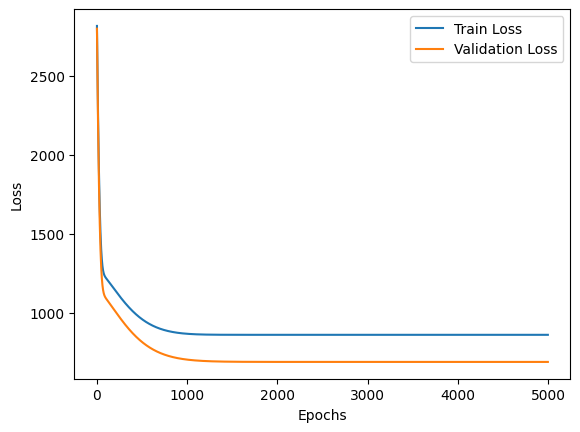

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  sq_diffs = (t_p - t_c)**2
  return sq_diffs.mean()

# define t_u and t_c datasets
t_c = torch.arange(0, 100)
perm = torch.randperm(100)
t_u = t_c[perm]

n_samples = t_c.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

# train and val indices
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_un = 0.1 * t_u

# train and val data
t_u_train = t_un[train_indices]
t_u_val = t_un[val_indices]

t_c_train = t_c[train_indices]
t_c_val = t_c[val_indices]

# NN parameters
nepochs = 5000
learning_rate = 1e-1
params = torch.tensor([1.0, 0.0], requires_grad=True)  # parameters we're optimizing
optimizer = optim.Adam([params], lr=learning_rate)
train_history = []
val_history = []

# training process
for epoch in range(nepochs):
  # forward pass
  t_p_train = model(t_u_train, *params)
  train_loss = loss_fn(t_p_train, t_c_train)

  with torch.no_grad():
    t_p_val = model(t_u_val, *params)
    val_loss = loss_fn(t_p_val, t_c_val)

  train_history.append(float(train_loss))
  val_history.append(float(val_loss))

  print(f"Epoch: {epoch}, Train Loss: {float(train_loss)}, Validation Loss: {float(val_loss)}")

  # backward pass
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

params

train_history = np.array(train_history)
val_history = np.array(val_history)

plt.figure()

plt.plot(train_history, label="Train Loss")
plt.plot(val_history, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.show()

# Recipe 3-6. Implementing a Convolutional Neural Network (CNN) Problem

How do we implement a convolutional neural network using PyTorch?

## Solution

There are various built-in datasets available on torchvision. We are considering the MNIST dataset and trying to build a CNN model.

## How It Works

Let’s look at the following example. As a first step, we set up the hyperparameters. The second step is to set up the architecture. The last step is to train the model and make predictions.

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In the preceding code, we are importing the necessary libraries for deploying the convolutional neural network model using the digits dataset. The MNIST digits dataset is the most popular dataset in deep learning for computer vision and image processing.

In [ ]:
# Hyper parameters
EPOCHS = 1  # train the input data n times, to save time we just train 1 epoch
BATCH_SIZE = 50  # 50 samples at a time to pass through the epoch
LR = 1e-3  # learning rate
DOWNLOAD_MNIST = True  # set to False if you have downloaded

In [ ]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),
    # torch.FloatTensor of shape (Color x Height x Width) and
    # normalize in range [0.0, 1.0]
    download=DOWNLOAD_MNIST, # download if you don't have it
)

100%|██████████| 9912422/9912422 [00:00<00:00, 115137556.89it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36084508.14it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29038967.23it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5453916.05it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])
torch.Size([60000])


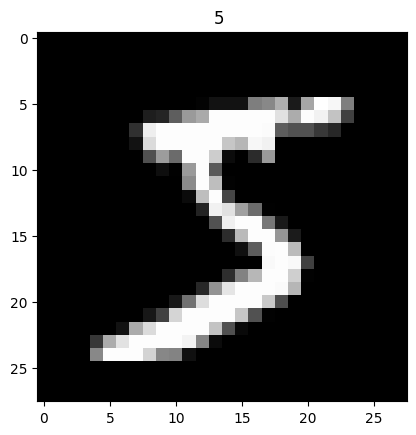

In [ ]:
# plot one example
print(train_data.train_data.size())      # (60000, 28, 28)
print(train_data.targets.size())    # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i ' % train_data.targets[0])
plt.show()

Let’s load the dataset using the loader functionality.

In [ ]:
# Data Loader for easy mini-batch return in training, the image batch shape will be
# (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255
# shape from (2000, 28, 28) to (2000, 1, 28, 28) value in range [0, 1]
test_y = test_data.targets[:2000]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In convolutional neural network architecture, the input image is converted to a feature set as set by color times height and width of the image. Because of the dimensionality of the dataset, we cannot model it to predict the output. The output layer in the preceding graph has classes such as car, truck, van, and bicycle. The input bicycle image has features that the CNN model should make use of and predict it correctly. The convolution layer is always accompanied by the pooling layer, which can be max pooling and average pooling. The different layers of pooling and convolution continue until the dimensionality is reduced to a level where we can use fully connected simple neural networks to predict the correct classes.

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential( # input shape (1, 28, 28)
        nn.Conv2d(
            in_channels=1,      # input height
            out_channels=16,    # n_filters
            kernel_size=5,      # filter size
            stride=1,           # filter movement/step
            padding=2,
            # if want same width and length of this image after conv2d
            # padding=(kernel_size-1)/2 if stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        # choose max value in 2x2 area, output shape (16, 14, 14)
    )
    self.conv2 = nn.Sequential(     # input shape (1, 28, 28)
        nn.Conv2d(16, 32, 5, 1, 2), # output shape (32, 14, 14)
        nn.ReLU(),                  # activation function
        nn.MaxPool2d(2)             # output shape (32, 7, 7)
    )
    self.out = nn.Linear(32 * 7 * 7, 10)  # fully-connected layer, output 10 classes

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)
    # flatten the output of conv2d to (batch_size, 32 * 7 * 7)
    output = self.out(x)
    return output, x  # return x for visualization

In [ ]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                      # the target label is not one-hotted

In [ ]:
from matplotlib import cm
try:
  from sklearn.manifold import TSNE; HAS_SK = True
except:
  HAS_SK = False; print('Please install sklearn for layer visualization, if not there')

def plot_with_labels(lowDWeights, labels):
  plt.cla()
  X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
  for x, y, s in zip(X, Y, labels):
    c = cm.rainbow(int(255 * s / 9))
    plt.text(x, y, s, backgroundcolor=c, fontsize=9)
  plt.xlim(X.min(), X.max())
  plt.ylim(Y.min(), Y.max())
  plt.title('Visualize last layer')
  # plt.pause(0.01)

plt.ion()

Epoch:  0 | train loss:    2 | test accuracy: 0.18
Epoch:  0 | train loss:    0 | test accuracy: 0.89
Epoch:  0 | train loss:    0 | test accuracy: 0.93
Epoch:  0 | train loss:    0 | test accuracy: 0.95
Epoch:  0 | train loss:    0 | test accuracy: 0.96
Epoch:  0 | train loss:    0 | test accuracy: 0.96
Epoch:  0 | train loss:    0 | test accuracy: 0.96
Epoch:  0 | train loss:    0 | test accuracy: 0.97
Epoch:  0 | train loss:    0 | test accuracy: 0.98
Epoch:  0 | train loss:    0 | test accuracy: 0.98
Epoch:  0 | train loss:    0 | test accuracy: 0.98
Epoch:  0 | train loss:    0 | test accuracy: 0.98


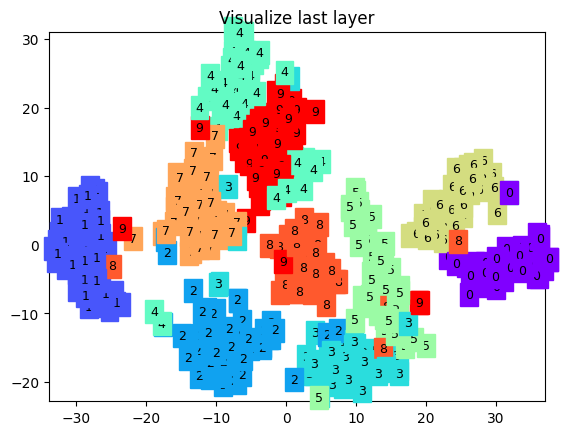

In [ ]:
for epoch in range(EPOCHS):
  for step, (x, y) in enumerate(train_loader):
    # gives batch data, normalize x when iterate train_loader
    b_x = Variable(x)  # batch x
    b_y = Variable(y)  # batch y

    output = cnn(b_x)[0]             # cnn output
    loss = loss_func(output, b_y)    # cross entropy loss
    optimizer.zero_grad()            # clear gradients for this training step
    loss.backward()                  # bacpropagation, compute gradients
    optimizer.step()                 # apply gradients

    if step % 100 == 0:
      test_output, last_layer = cnn(test_x)
      pred_y = torch.max(test_output, 1)[1].data.squeeze()
      accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
      print('Epoch: ', epoch, '| train loss: % 4.f' % loss.item(),
            '| test accuracy: %.2f' % accuracy)
      if HAS_SK:
        # Vsualization of trained flatten layer (T-SNE)
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
        plot_only = 500
        low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
        labels = test_y.numpy()[:plot_only]
        plot_with_labels(low_dim_embs, labels)
plt.ioff()

In the preceding graph, if we look at the number 4, it is scattered throughout the graph. Ideally, all of the 4s are closer to each other. This is because the test accuracy was very low.

In the final step/epoch, the digits with similar numbers are placed together. After training a model successfully, the next step is to make use of the model to predict. The following code explains the predictions process. The output object is numbered as 0, 1, 2, and so forth. The following shows the real and predicted numbers.


In [ ]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


## Exercise

Epoch: 0 | loss: 2.2937302589416504 | accuracy: 0.0945
Epoch: 0 | loss: 0.31115829944610596 | accuracy: 0.7795
Epoch: 0 | loss: 0.5011589527130127 | accuracy: 0.8155
Epoch: 0 | loss: 0.25083914399147034 | accuracy: 0.845
Epoch: 0 | loss: 0.472593754529953 | accuracy: 0.836
Epoch: 0 | loss: 0.5509700179100037 | accuracy: 0.856
Epoch: 0 | loss: 0.2606008052825928 | accuracy: 0.856
Epoch: 0 | loss: 0.3007138669490814 | accuracy: 0.845
Epoch: 0 | loss: 0.3538786768913269 | accuracy: 0.8425
Epoch: 0 | loss: 0.3532942533493042 | accuracy: 0.8595
Epoch: 0 | loss: 0.31031426787376404 | accuracy: 0.859
Epoch: 0 | loss: 0.33703935146331787 | accuracy: 0.8705


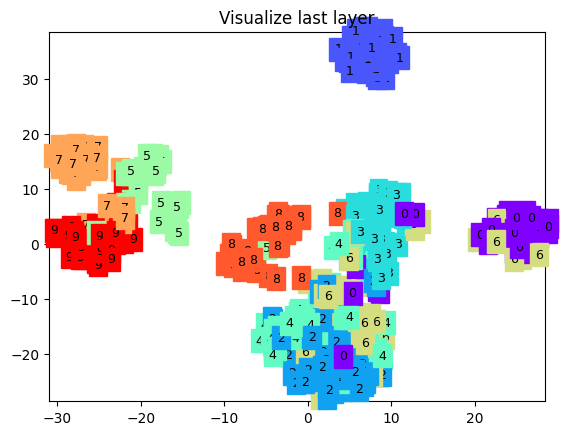

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
from torch.autograd import Variable
import torchvision
import matplotlib.pyplot as plt
from matplotlib import cm
try:
  from sklearn.manifold import TSNE; HAS_SK = True
except:
  HAS_SK = False; print("Please install sklearn for layer visualization, if not there")
%matplotlib inline

def plot_with_labels(lowDWeights, labels):
  plt.cla()  # clear plot
  X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
  for x, y, s in zip(X, Y, labels):
    c = cm.rainbow(int(255 * s / 9))  # mapping label value to color
    plt.text(x, y, s, backgroundcolor=c, fontsize=9)
  plt.xlim(X.min(), X.max())
  plt.ylim(Y.min(), Y.max())
  plt.title("Visualize last layer")

plt.ion() # interactive mode on

# hyperparameters
EPOCHS = 1
BATCH_SIZE = 50
LR = 10e-3
DOWNLOAD=True

train_data = torchvision.datasets.FashionMNIST(
    root='./fashionmnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD
)

test_data = torchvision.datasets.FashionMNIST(
    root='./fashionmnist',
    train=False
)

idx2name = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

train_loader = Data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)
test_x = Variable(torch.unsqueeze(test_data.data, 1).type(torch.FloatTensor))[:2000] / 255
test_y = test_data.targets[:2000]

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(16,32,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.conv3 = nn.Sequential(
        nn.Conv2d(32,64,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.output = nn.Linear(64*3*3, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    out = self.output(x)

    return out, x # x for visualization

  def predict(self, x):
    out = self.forward(x)
    _, pred = torch.max(out, 1)

    return pred

model = CNN()

# loss and optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
  for step, (x,y) in enumerate(train_loader):
    b_x = Variable(x)
    b_y = Variable(y)

    out = model(b_x)[0]
    loss = loss_fn(out, b_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
      output, last_layer = model(test_x)
      pred_y = torch.max(output, 1)[1]
      accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
      print(f"Epoch: {epoch} | loss: {loss} | accuracy: {accuracy}")

      if HAS_SK:
        # Visualization of trained flatten layer (T-SNE)
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
        plot_only = 500
        low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
        labels = test_y.numpy()[:plot_only]
        plot_with_labels(low_dim_embs, labels)
plt.ioff()

Input tensor size: torch.Size([1, 1, 28, 28])
Predicted tensor: tensor([2])


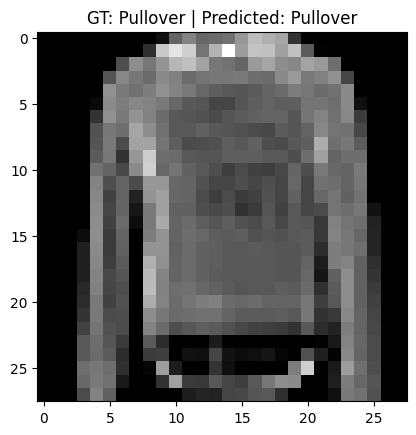

In [ ]:
model.eval()

num_image = 16

data = test_data.data[num_image].unsqueeze(0)
data = data.float() /255
data = data.unsqueeze(0)
print(f"Input tensor size: {data.size()}")

pred = model.predict(data)
print(f"Predicted tensor: {pred}")

plt.imshow(test_data.data[num_image].squeeze().numpy(), cmap='gray')
plt.title(f"GT: {idx2name[int(test_data.targets[num_image])]} | Predicted: {idx2name[int(pred)]}")
plt.show()

# Recipe 3-7. Reloading a Model Problem

How do we store and re-upload a model that has already been trained? Given the nature of deep learning models, which typically require a larger training time, the computational process creates a huge cost to the company. Can we retrain the model with new inputs and store the model?

## Solution

In the production environment, we typically cannot train and predict at the same time because the training process takes a very long time. The prediction services cannot be applied until the training process using epoch is completed, the prediction services cannot be applied. Disassociating the training process from the prediction process is required; therefore, we need to store the application’s trained model and continue until the next phase of training is done.

## How It Works

Let’s look at the following example, where we are creating the save function, which uses the Torch neural network module to create the model and the restore_net() function to get back the neural network model that was trained earlier.

In [ ]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

# sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

The preceding script contains a dependent Y variable and an independent X variable as sample data points to create a neural network model. The following save function stores the model. The net1 object is the trained neural network model, which can be stored using two different protocols: (1) save the entire neural network model with all the weights and biases, and (2) save the model using only the weights. If the trained model object is very heavy in terms of size, we should save only the parameters that are weights; if the trained object size is low, then the entire model can be stored.

In [ ]:
def save():
  # save net1
  net1 = torch.nn.Sequential(
      torch.nn.Linear(1, 10),
      torch.nn.ReLU(),
      torch.nn.Linear(10, 1)
  )
  optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
  loss_func = torch.nn.MSELoss()

  for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # plot results
  plt.figure(1, figsize=(10, 3))
  plt.subplot(131)
  plt.title('Net1')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

  # 2 ways to save the net
  torch.save(net1, 'net.pkl')  # save entire net
  torch.save(net1.state_dict(), 'net_params.pkl')  # save only parameters

The prebuilt neural network model can be reloaded to the existing PyTorch session by using the load function. To test the net1 object and make predictions, we load the net1 object and store the model as net2. By using the net2 object, we can predict the outcome variable. The following script generates the graph as a dependent and an independent variable. prediction.data.numpy() in the last line of the code shows the predicted result.


In [ ]:
def restore_net():
  # restore entire net1 to net2
  net2 = torch.load('net.pkl')
  prediction = net2(x)

  # plot results
  plt.subplot(132)
  plt.title('Net2')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

Loading the pickle file format of the entire neural network is relatively slow; however, if we are only making predictions for a new dataset, we can only load the parameters of the model in a pickle format rather than the whole network.Reuse the model. The restore function makes sure that the trained parameters can be reused by the model. To restore the model, we can use the load_state_dict() function to load the parameters of the model. If we see the following three models in the graph, they are identical, because net2 and net3 are copies of net1.

In [ ]:
def restore_params():
  # restore only the parameters in net1 to net3
  net3 = torch.nn.Sequential(
      torch.nn.Linear(1, 10),
      torch.nn.ReLU(),
      torch.nn.Linear(10, 1)
  )

  # copy net1's parameters into net3
  net3.load_state_dict(torch.load('net_params.pkl'))
  prediction = net3(x)

  # plot results
  plt.subplot(133)
  plt.title('Net3')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
  plt.show()

Reuse the model. The restore function makes sure that the trained parameters can be reused by the model. To restore the model, we can use the load_state_dict() function to load the parameters of the model. If we see the following three models in the graph, they are identical, because net2 and net3 are copies of net1.

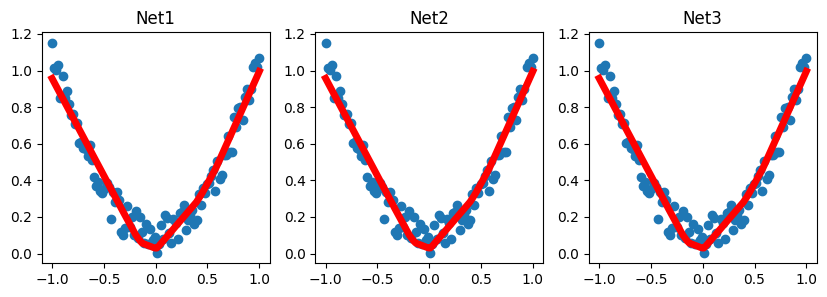

In [ ]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

# Recipe 3-8. Implementing a Recurrent Neural Network (RNN) Problem

How do we set up a recurrent neural network using the MNIST dataset?

## Solution

The recurrent neural network is considered as a memory network. We will use the epoch as 1 and a batch size of 64 samples at a time to establish the connection between the input and the output. Using the RNN model, we can predict the digits present in the images.

## How It Works

Let’s look at the following example. The recurrent neural network takes a sequence of vectors in the input layer and produces a sequence of vectors in the output layer. The information sequence is processed through the internal state transfer in the recurrent layer. Sometimes the output values have a long dependency in past historical values. This is another variant of the RNN model: the long short-term memory (LSTM) model. This is applicable for any sort of domain where the information is consumed in a sequential manner; for example, in a time series where the current stock price is decided by the historical stock price, where the dependency can be short or long. Similarly, the context prediction using the long and short range of textual input vectors. There are other industry use cases, such as noise classification, where noise is also a sequence of information.

The following piece of code explains the execution of RNN model using PyTorch module.

There are three sets of weights: U, V and W. The set of weights vector, represented by W, is for passing information among the memory cells in the network that display communication among the hidden state. RNN uses an embedding layer using the Word2vec representation. The embedding matrix is the size of the number of words by the number of neurons in the hidden layer. If you have 20,000 words and 1000 hidden units, for example, the matrix has a 20,000×1000 size of the embedding layer. The new representations are passed to LSTM cells, which go to a sigmoid output layer.

In [9]:
import torch
from torch import nn
from torch.autograd import Variable
from torchvision import datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train one epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to true if haven't download data

# Mnist digital dataset
train_data = dsets.MNIST(
    root = './mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


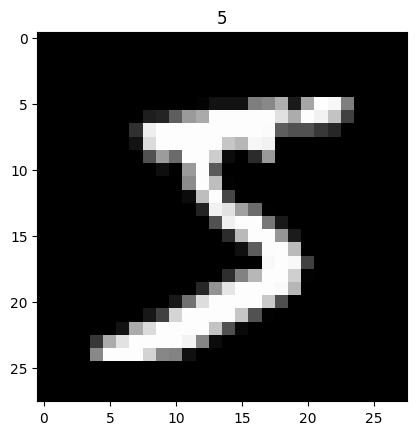

In [6]:
# plot one example
print(train_data.data.size())      # (60000, 28, 28)
print(train_data.targets.size())   # 60000
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title(f'{train_data.targets[0]}')
plt.show()

The preceding script prepares the training dataset. The test data is captured with the flag train=False. It is transformed to a tensor using the test data random sample of 2000 each at a time is picked up for testing the model. The test features set is converted to a variable format and the test label vector is represented in a NumPy array format.

In [12]:
# DataLoader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True)

# convert test data into Variable, pich 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.data, volatile=True).type(torch.FloatTensor)[:2000]/255.
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.targets.numpy().squeeze()[:2000]  # convert to numpy array

<ipython-input-12-0440ce4c1a20>:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_x = Variable(test_data.data, volatile=True).type(torch.FloatTensor)[:2000]/255.


In [7]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()

    self.rnn = nn.LSTM(               # if use nn.RNN(), it hardly learns
        input_size=INPUT_SIZE,
        hidden_size=64,               # rnn hidden unit
        num_layers=1,                 # number of rnn layers
        batch_first=True,             # if set to True, then the input and output tensors are provided as (batch, seq, feature).
    )

    self.out = nn.Linear(64, 10)

  def forward(self, x):
    # x shape (batch, time_step, input_size)
    # r_out shape (batch, time_step, output_size)
    # h_n shape (n_layers, batch, hidden_size)
    # h_c shape (n_layers, batch, hidden_size)

    # Pass input through LSTM layer
    r_out, (h_n, h_c) = self.rnn(x, None)       # None represents zero initial hidden state

    # choose r_out at the last time step
    # Pass the last time step's hidden state through the linear layer
    out = self.out(r_out[:, -1, :])
    return out

In the preceding RNN class, we are training an LSTM network, which is proven effective for holding memory for a long time, and thus helps in learning. If we use the nn.RNN() model, it hardly learns the parameters, because the vanilla implementation of RNN cannot hold or remember the information for a long period of time. In the LSTM network, the image width is considered the input size, hidden size is decided as the number of neurons in the hidden layer, num_layers shows the number of RNN layers in the network.


The RNN module, within the LSTM module, produces the output as a vector size of 64×10 because the output layer has digits to be classified as 0 to 9. The last forward function shows how to proceed with forward propagation in an RNN network.

The following script shows how the LSTM model is processed under the RNN class. In the LSTM function, we pass the input length as 28 and the number of neurons in the hidden layer as 64, and from the hidden 64 neurons to the output 10 neurons.

In [13]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimizer all rnn parameters
loss_func = nn.CrossEntropyLoss()

To optimize all RNN parameters, we use the Adam optimizer. Inside the function, we use the learning rate as well. The loss function used in this example is the cross-entropy loss function. We need to provide multiple epochs to get the best parameters.

In the following script, we are printing the training loss and the test accuracy. After one epoch, the test accuracy increases to 95% and the training loss reduces to 0.24.

In [111]:
# training and testing
for epoch in range(EPOCH):
  for step, (x, y) in enumerate(train_loader):             # gives batch data
    b_x = Variable(x.view(-1, 28, 28))                     # reshapes x to (batch, time_step, input_size)
    b_y = Variable(y)                                      # batch y

    output = rnn(b_x)                                      # rnn output
    loss = loss_func(output, b_y)                          # cross entropy loss
    optimizer.zero_grad()                                  # clear gradients for this training step
    loss.backward()                                        # backpropagation, compute gradients
    optimizer.step()                                       # Apply gradients

    if step % 50 == 0:
      test_output = rnn(test_x)                            # (samples, time_step, input_size)
      pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
      accuracy = sum(pred_y == test_y).item() / float(test_y.size)
      print(f'Epoch: {epoch} | train loss: {loss.item()} | test accuracy: {accuracy}')

Epoch: 0 | train loss: 0.23825699090957642 | test accuracy: 0.9345
Epoch: 0 | train loss: 0.1604825258255005 | test accuracy: 0.9425
Epoch: 0 | train loss: 0.12361493706703186 | test accuracy: 0.96
Epoch: 0 | train loss: 0.18804824352264404 | test accuracy: 0.96
Epoch: 0 | train loss: 0.10152845829725266 | test accuracy: 0.9595
Epoch: 0 | train loss: 0.0185153279453516 | test accuracy: 0.952
Epoch: 0 | train loss: 0.048388127237558365 | test accuracy: 0.9435
Epoch: 0 | train loss: 0.08998347073793411 | test accuracy: 0.9565
Epoch: 0 | train loss: 0.13088522851467133 | test accuracy: 0.9575
Epoch: 0 | train loss: 0.15217553079128265 | test accuracy: 0.9585
Epoch: 0 | train loss: 0.08087503165006638 | test accuracy: 0.954
Epoch: 0 | train loss: 0.04208630323410034 | test accuracy: 0.965
Epoch: 0 | train loss: 0.24386802315711975 | test accuracy: 0.962
Epoch: 0 | train loss: 0.07860749959945679 | test accuracy: 0.962
Epoch: 0 | train loss: 0.1302388608455658 | test accuracy: 0.9665
Epoch:

Once the model is trained, then the next step is to make predictions using the RNN model. Then we compare the actual vs. real output to assess how the model is performing.

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


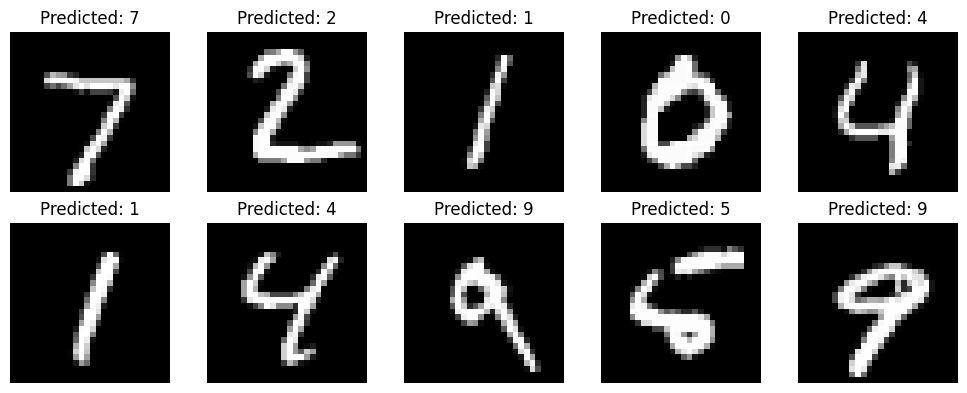

In [112]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

# Create a new figure
fig, axs = plt.subplots(2, 5, figsize=(10, 4))

for i in range(10):
    # Calculate the row and column indices
    row = i // 5
    col = i % 5

    # Plot the image with the predicted label
    axs[row, col].imshow(test_x[i].reshape((28,28)), cmap='gray')
    axs[row, col].set_title(f'Predicted: {pred_y[i]}')
    axs[row, col].axis('off')  # Hide the axes

# Show the figure
plt.tight_layout()
plt.show()

Check on images from google drive (paint).

In [93]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [189]:
!ls '/content/drive/MyDrive/Books_notebooks/PyTorch Recipes, Mishra P. 2019/drawing.png'

'/content/drive/MyDrive/Books_notebooks/PyTorch Recipes, Mishra P. 2019/drawing.png'


torch.Size([1, 28, 28])
9 prediction number


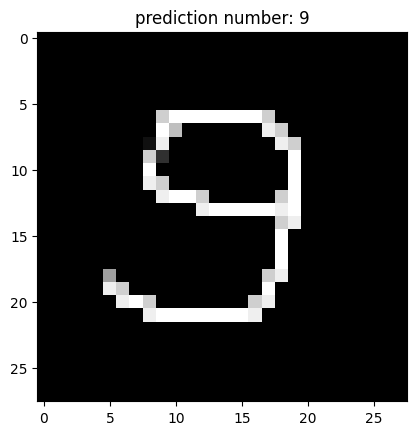

In [202]:
from PIL import Image
import numpy as np
import os
import torch
import cv2

# Load the image
img = Image.open('/content/drive/MyDrive/Books_notebooks/PyTorch Recipes, Mishra P. 2019/drawing.png')

# If the image has an alpha (transparency) channel, combine it with the color channels
if img.mode == 'RGBA':
    alpha = np.array(img)[:,:,3]
    alpha = np.expand_dims(alpha, axis=-1)  # Add an extra dimension to match with img shape
    img = img.convert('RGB')
    img = np.array(img)
    img = np.where(alpha == 0, 255, img)  # If pixel was transparent, make it white
else:
    img = np.array(img.convert('L'))  # If no alpha channel, just convert to grayscale

# Convert the color image to grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Invert the image
img_inverted = np.invert(img) / 255.0

# Add a new axis to make the shape (1, 28, 28)
img_array_new = np.expand_dims(img_inverted, axis=0)

# Convert the NumPy array to a PyTorch tensor
img_tensor = torch.from_numpy(img_array_new)

# Convert the tensor to float
img_tensor_float = img_tensor.float()

print(img_tensor_float.shape)  # Should print: torch.Size([1, 28, 28])

# predict our image
test_output = rnn(img_tensor_float)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')

plt.imshow(img_tensor_float.squeeze().numpy(), cmap='gray')
plt.title(f"prediction number: {pred_y}")
plt.show()

# Recipe 3-9. Implementing a RNN for Regression Problems Problem

How do we set up a recurrent neural network for regression-based problems?


## Solution

The regression model requires a target function and a feature set, and then a function to establish the relationship between the input and the output. In this example, we are going to use the recurrent neural network (RNN) for a regression task. Regression problems seem to be very simple; they do work best but are limited to data that shows clear linear relationships. They are quite complex when predicting nonlinear relationships between the input and the output.

## How It Works

Let’s look at the following example that shows a nonlinear cyclical pattern between input and output data. In the previous recipe, we looked at an example of RNN in general for classification-related problems, where predicted the class of the input image. In regression, however, the architecture of RNN would change, because the objective is to predict the real valued output. The output layer would have one neuron in regression-related problems.

In [211]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

# Hyper Parameters
TIME_STEP = 10       # rnn time step
INPUT_SIZE = 1       # rnn input size
LR = 0.02            # learning rate

RNN time step implies that the last 10 values predict the current value, and the rolling happens after that.

The following script shows some sample series in which the target cos function is approximated by the sin function.

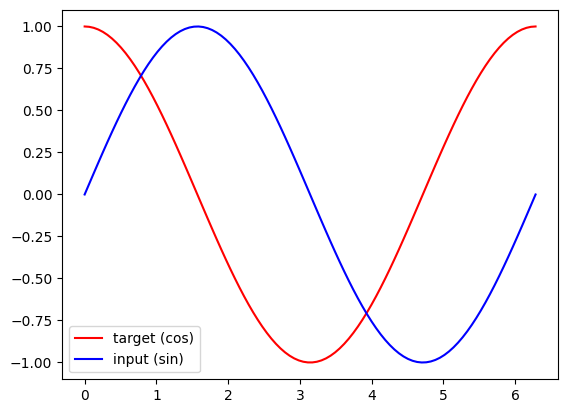

In [212]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)         # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

# Recipe 3-10. Using PyTorch Built-in Functions Problem

How do we set up an RNN module and call the RNN function using PyTorch?

## Solution

By using the built-in function available in the neural network module, we can implement an RNN model.


## How It Works

Let’s look at the following example. The neural network module in the PyTorch library contains the RNN function. In the following script, we use the input matrix size, the number of neurons in the hidden layer, and the number of hidden layers in the network.

In [213]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()

    self.rnn = nn.RNN(
        input_size=INPUT_SIZE,
        hidden_size=32,
        num_layers=1,
        batch_first=True,
    )
    self.out = nn.Linear(32, 1)

  def forward(self, x, h_state):
    r_out, h_state = self.rnn(x, h_state)

    outs = [] # save all predictions
    for time_step in range(r_out.size(1)):     # calculate output for each time step
      outs.append(self.out(r_out[:, time_step, :]))
    return torch.stack(outs, dim=1), h_state

After creating the RNN class function, we need to provide the optimization function, which is Adam, and this time, the loss function is the mean square loss function. Since the objective is to make predictions of a continuous variable, we use MSELoss function in the optimization layer.

In [214]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [216]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

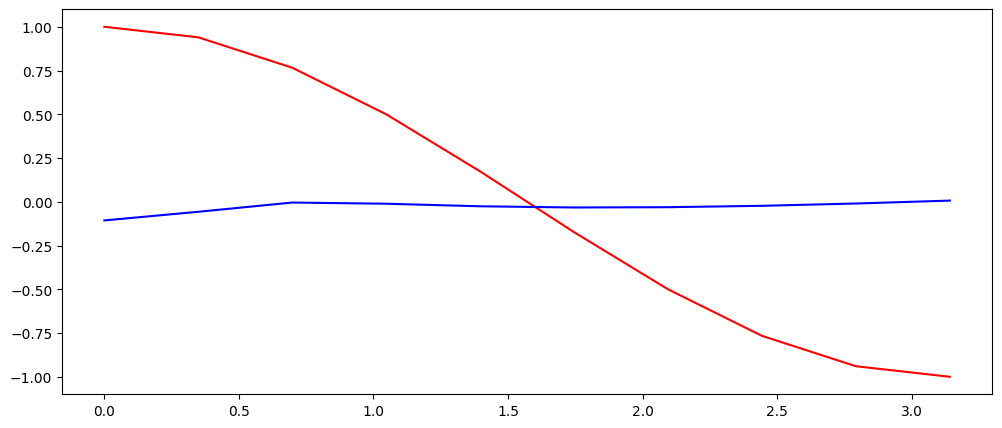

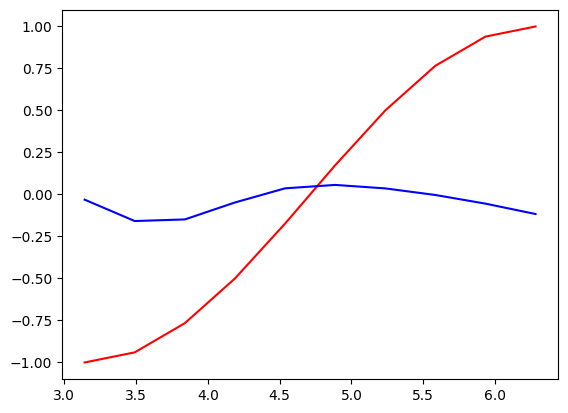

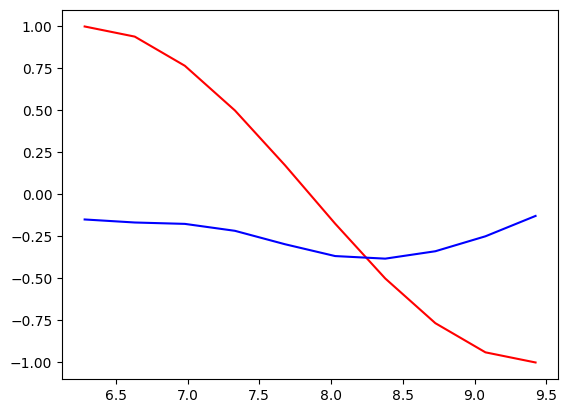

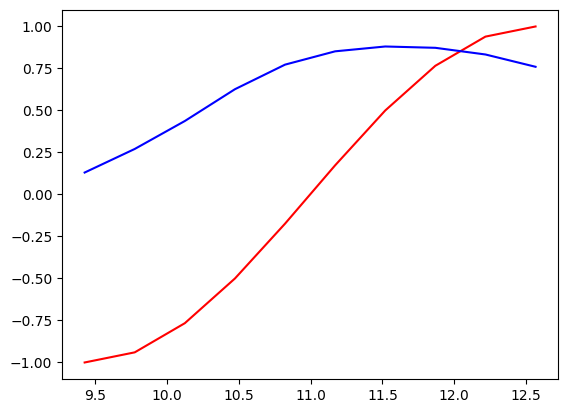

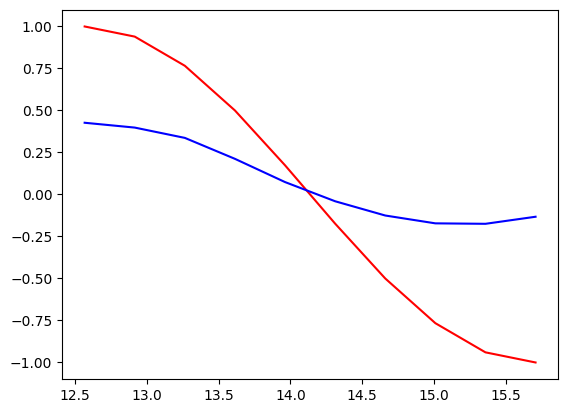

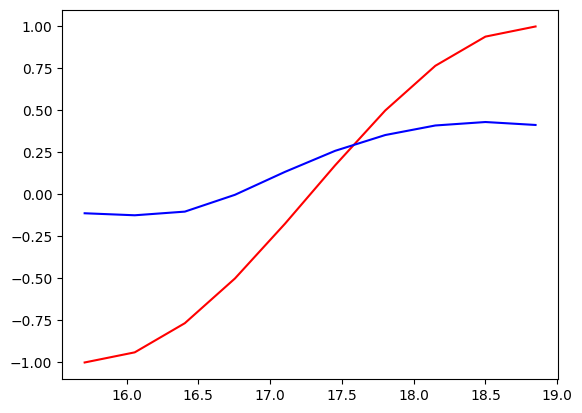

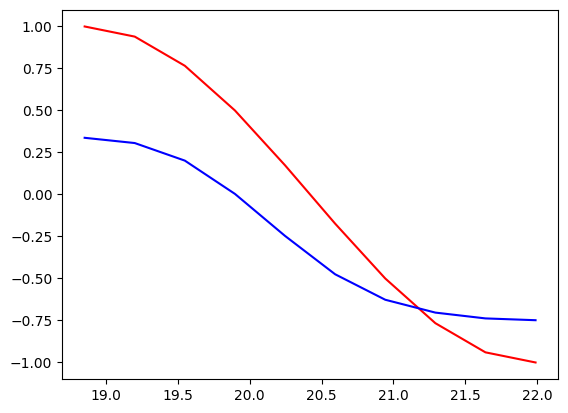

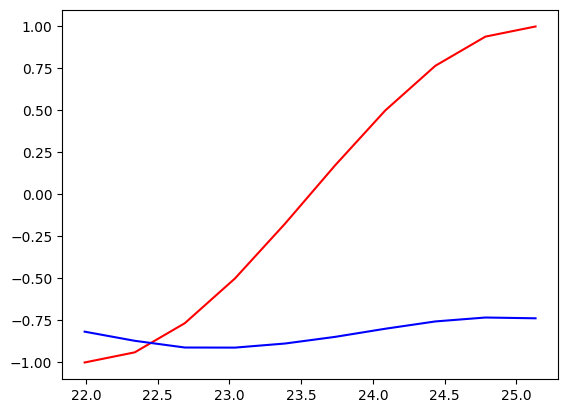

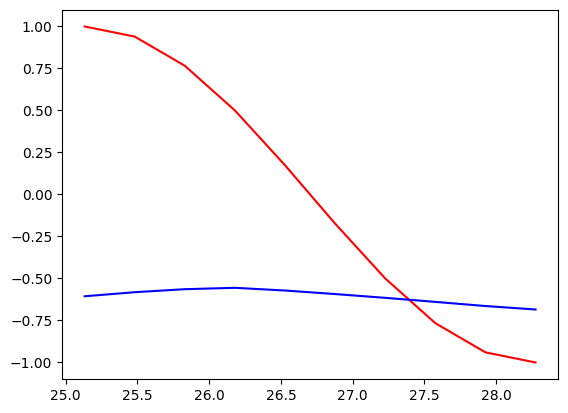

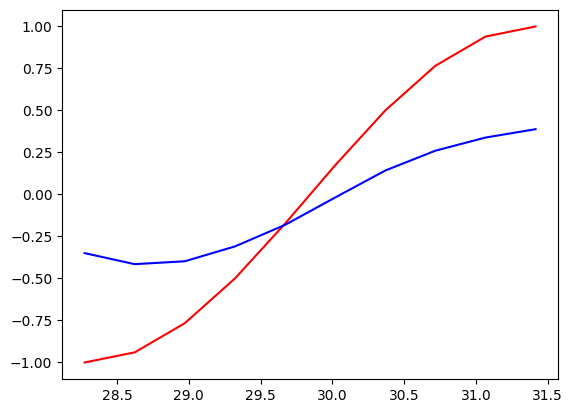

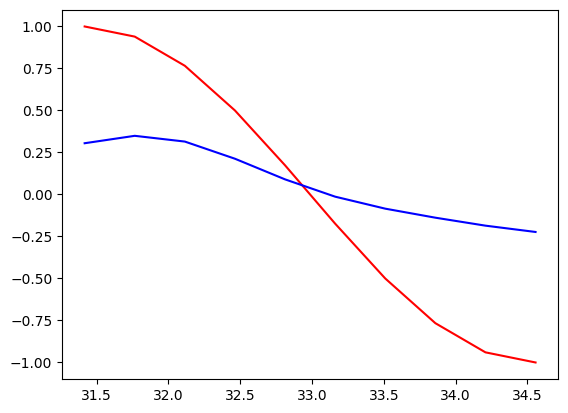

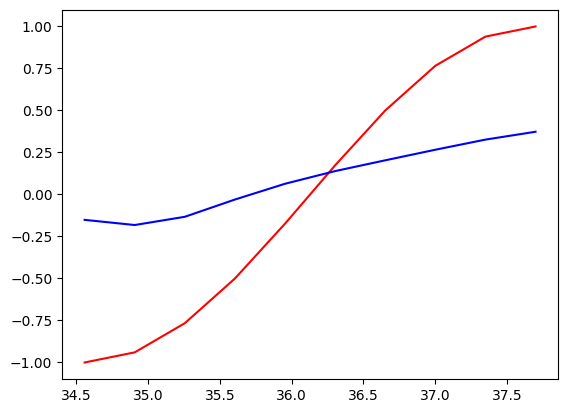

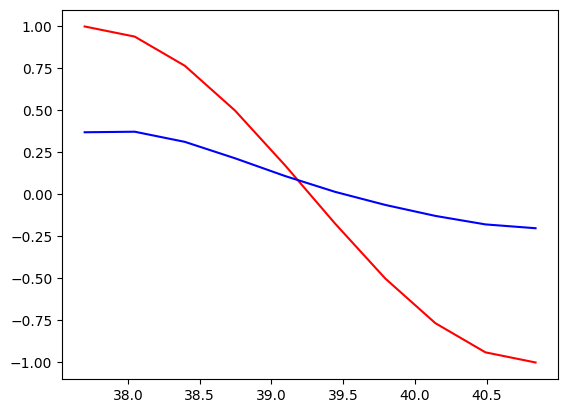

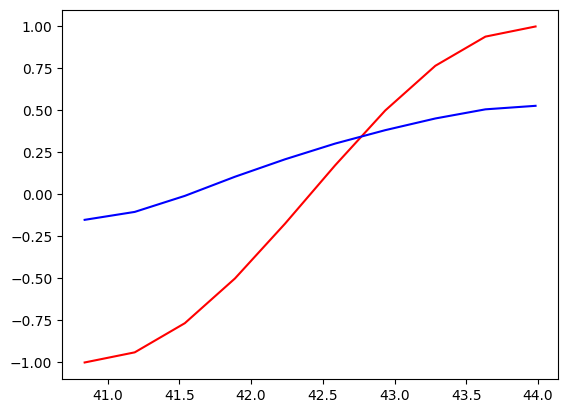

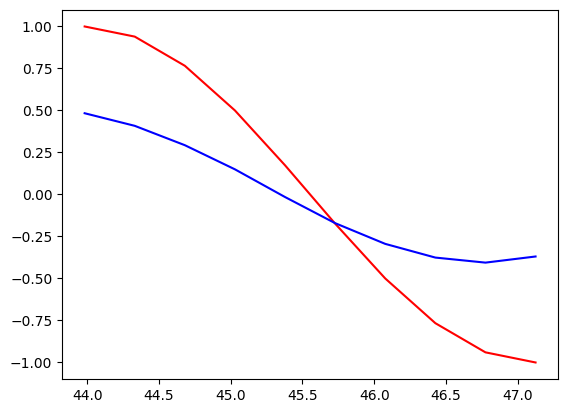

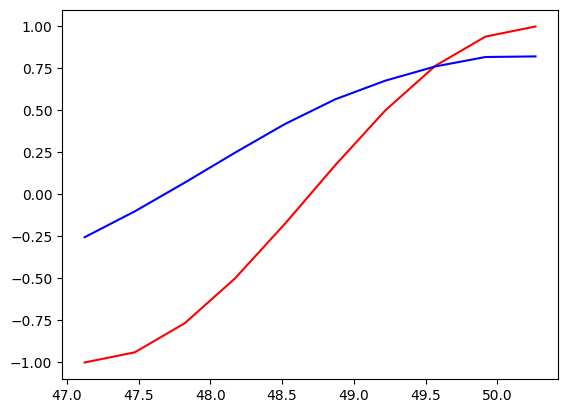

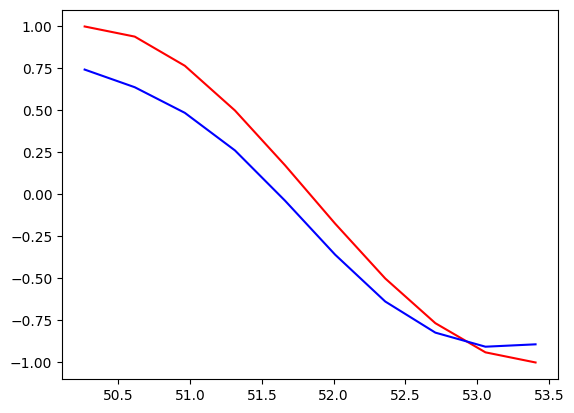

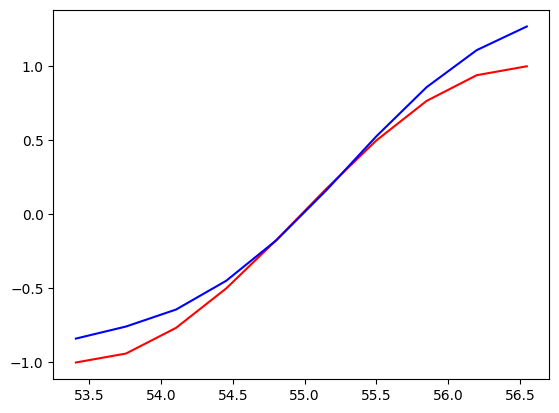

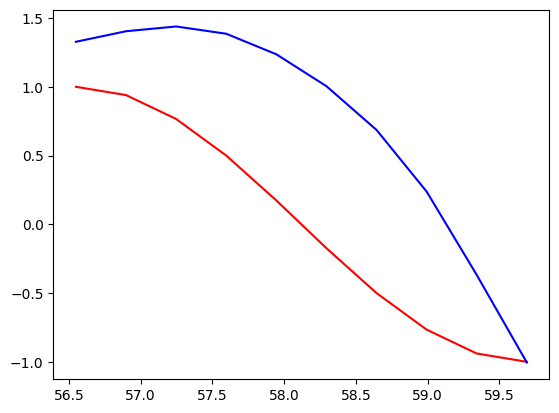

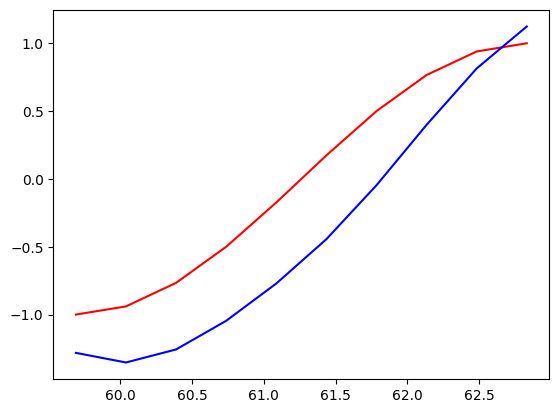

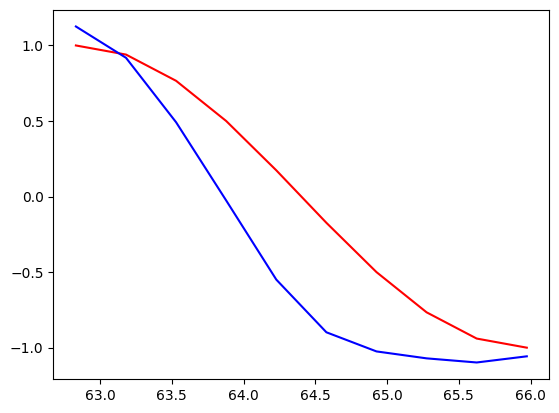

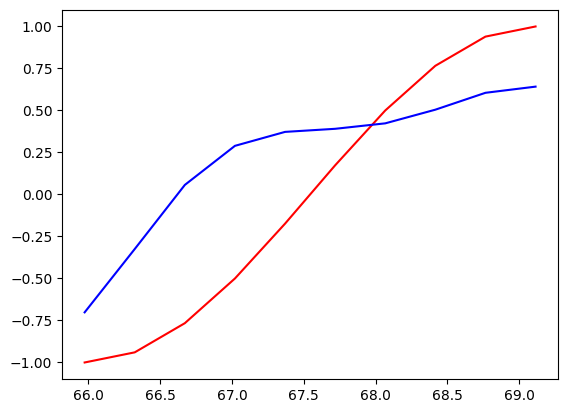

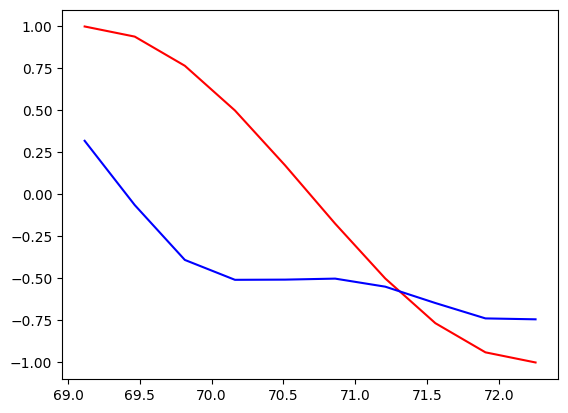

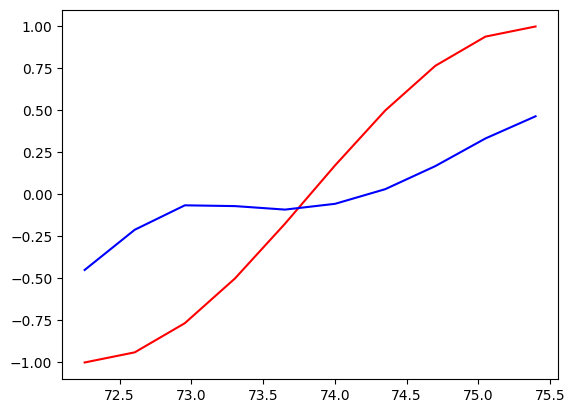

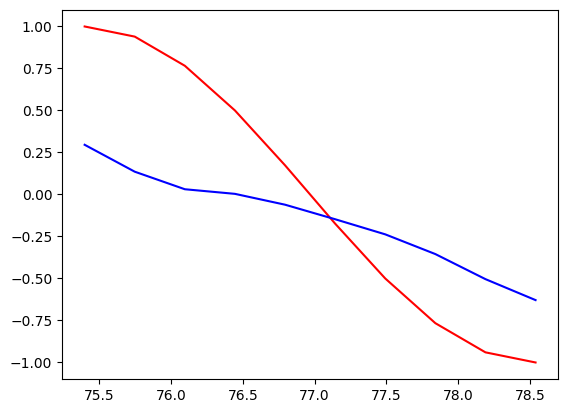

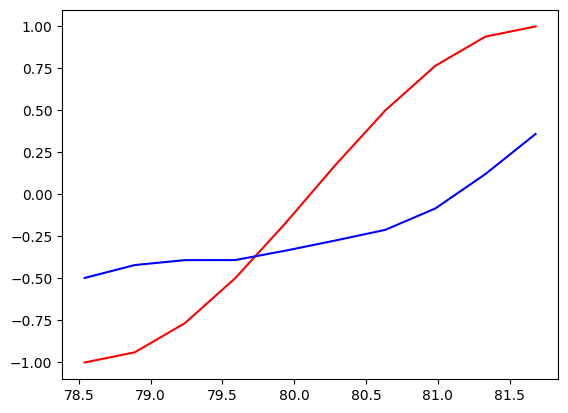

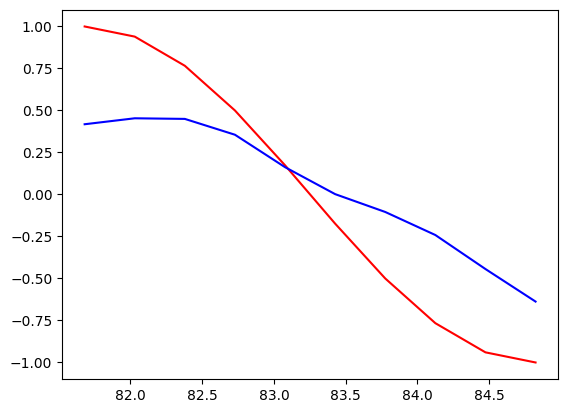

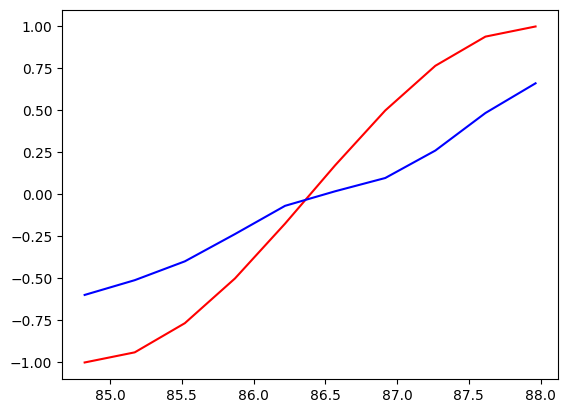

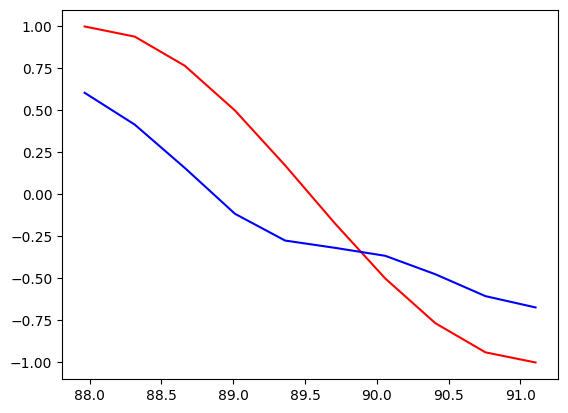

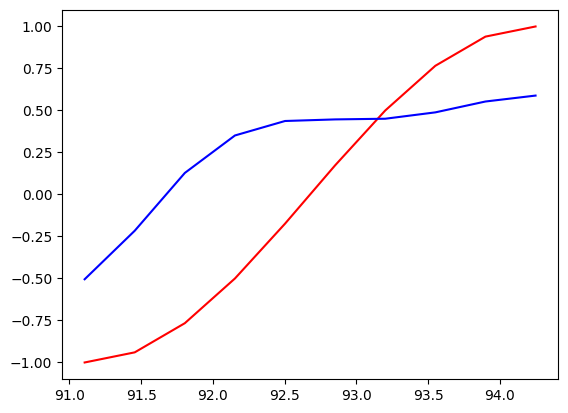

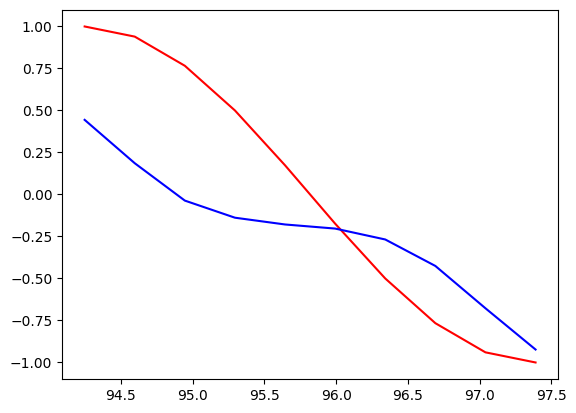

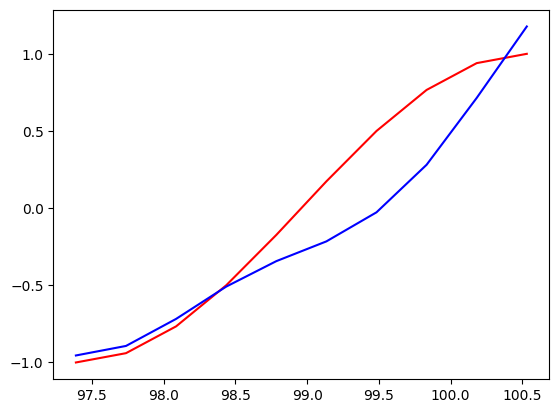

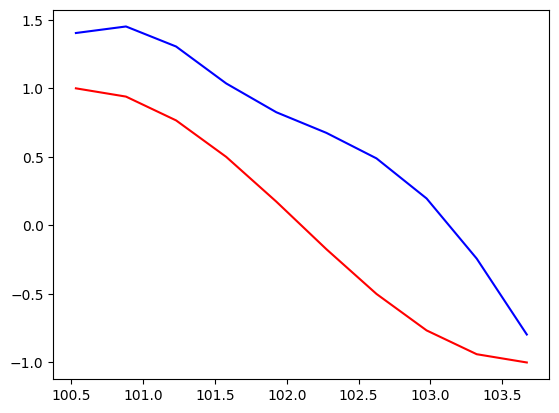

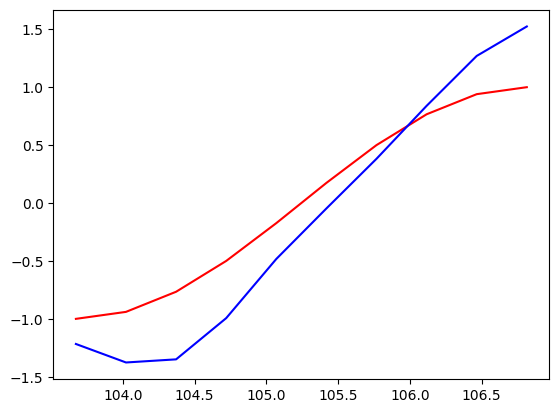

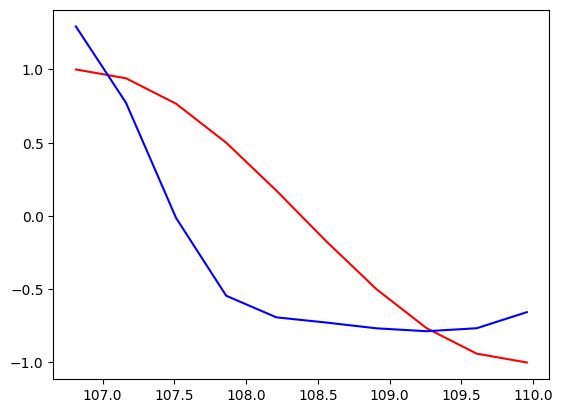

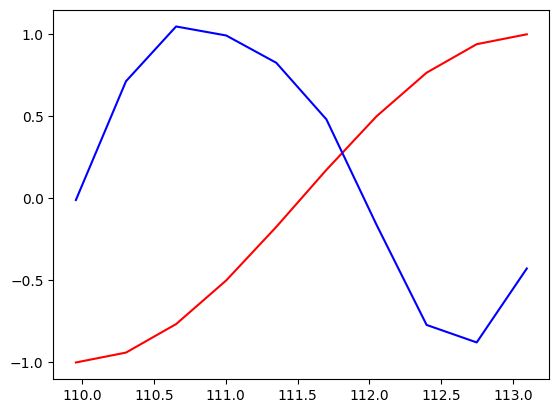

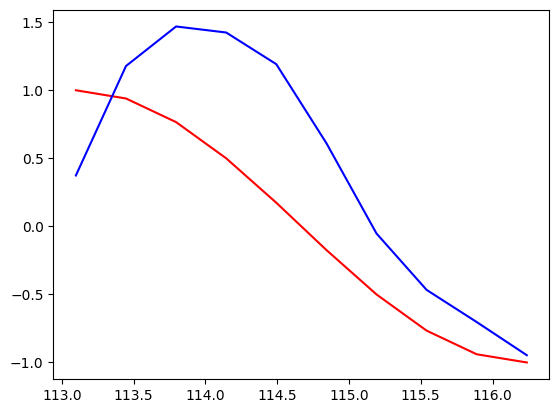

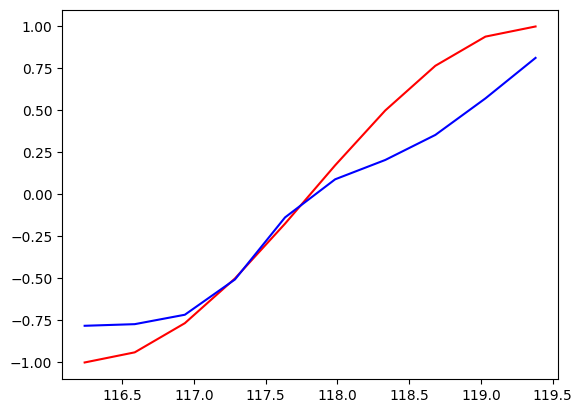

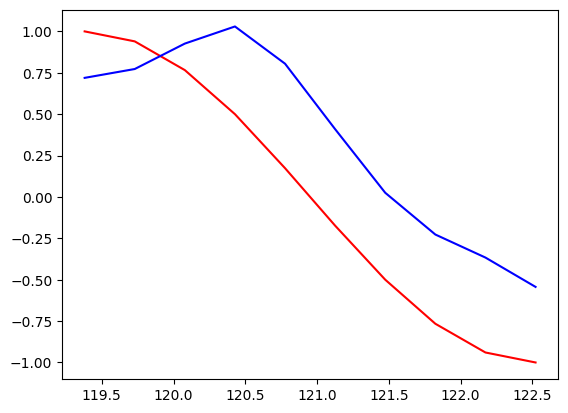

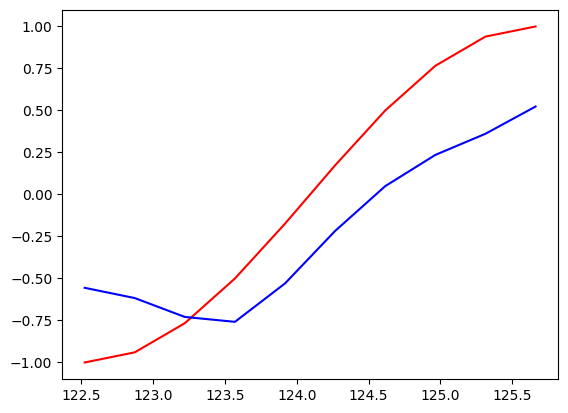

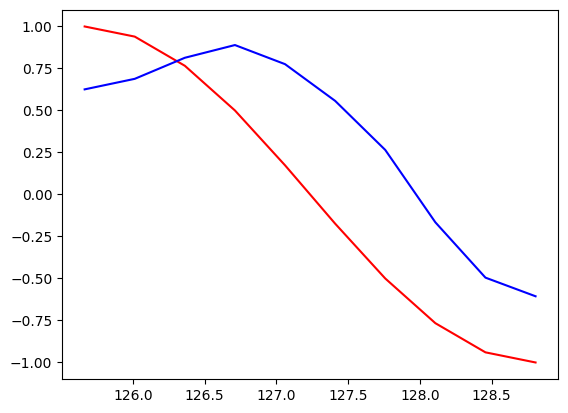

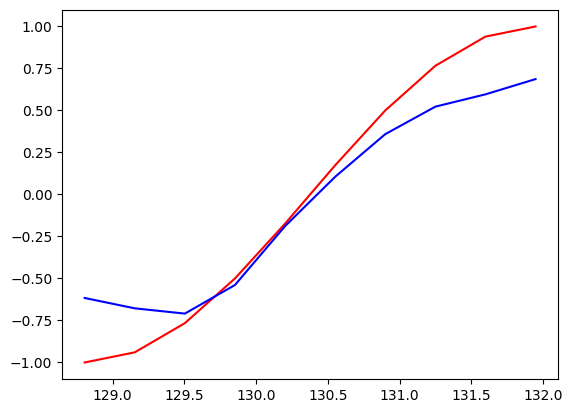

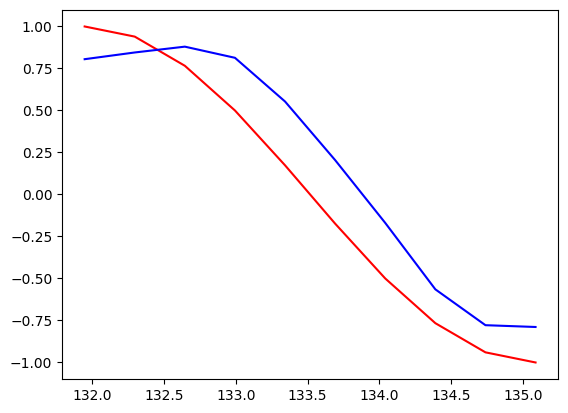

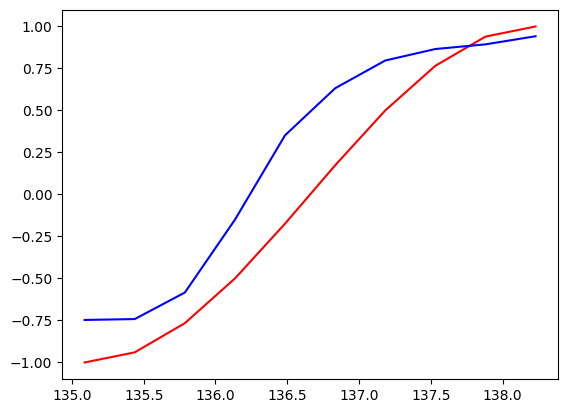

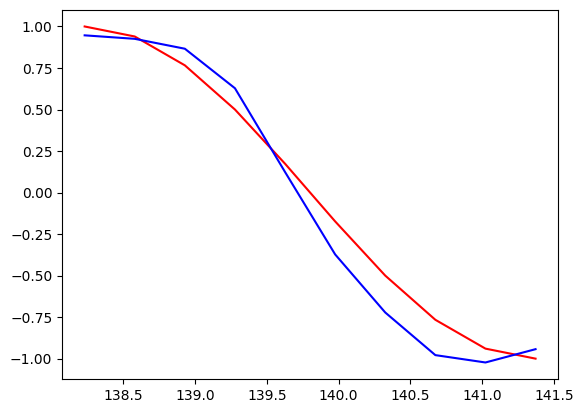

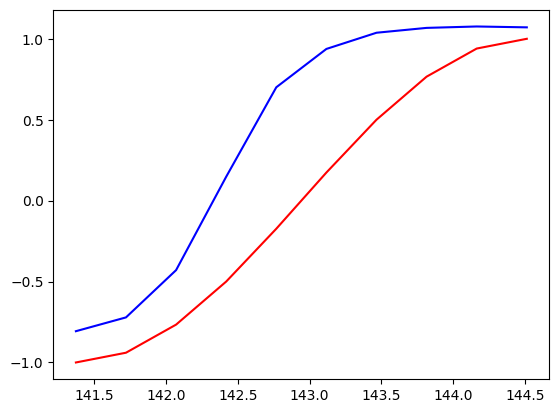

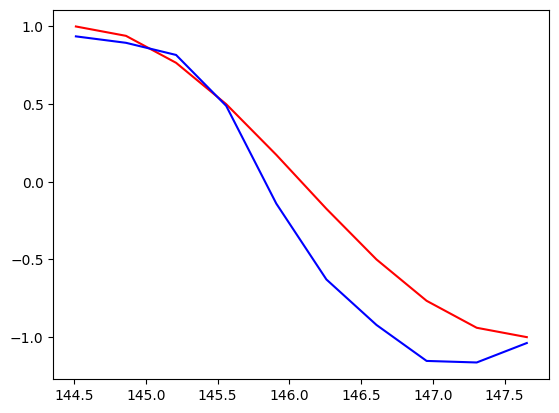

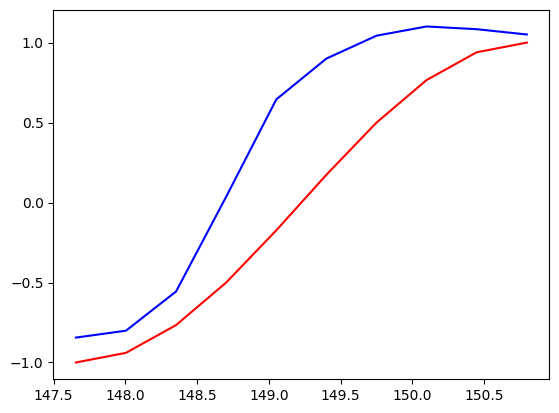

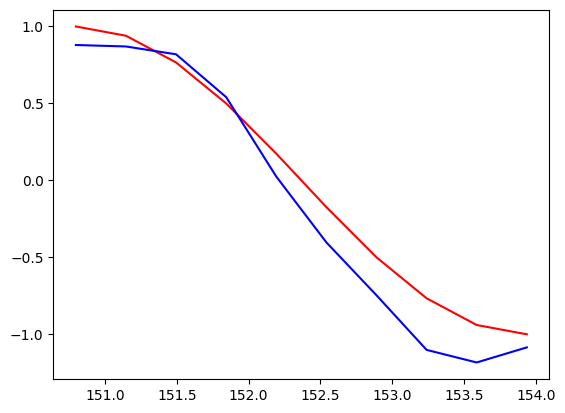

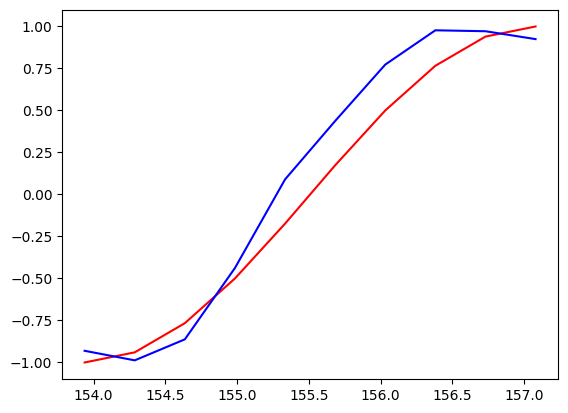

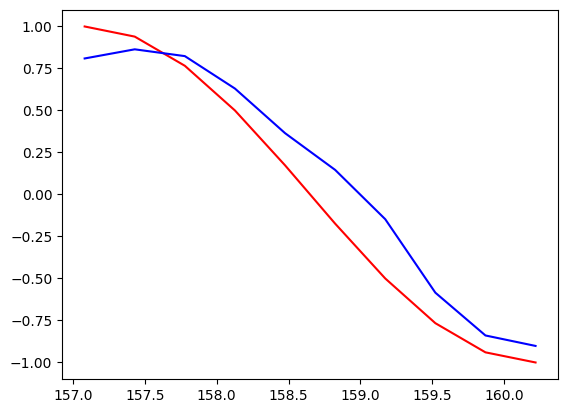

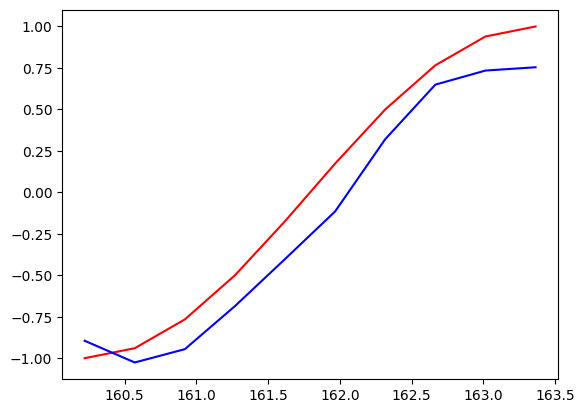

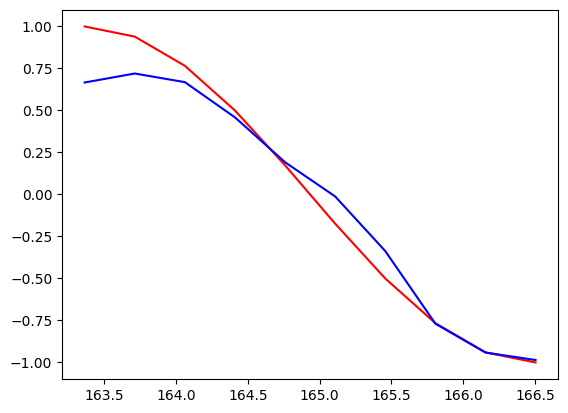

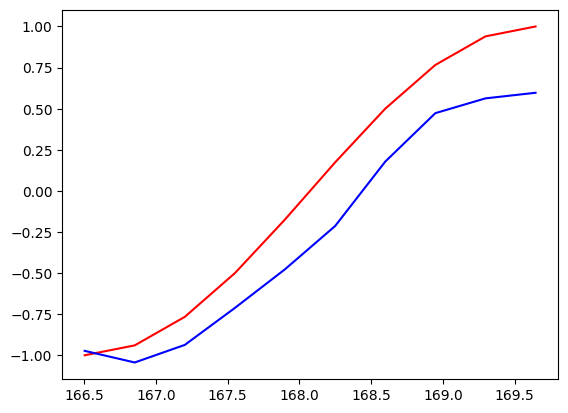

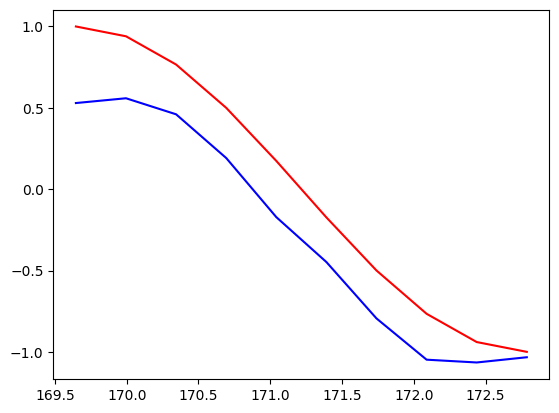

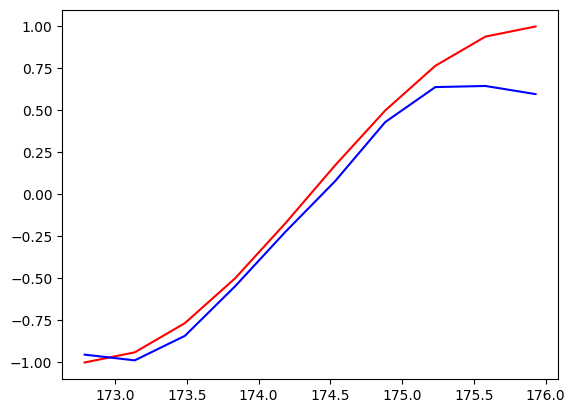

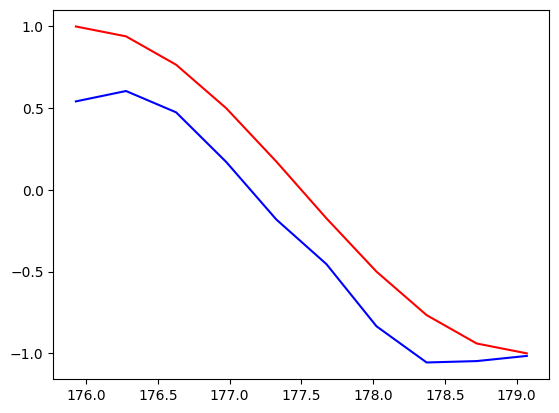

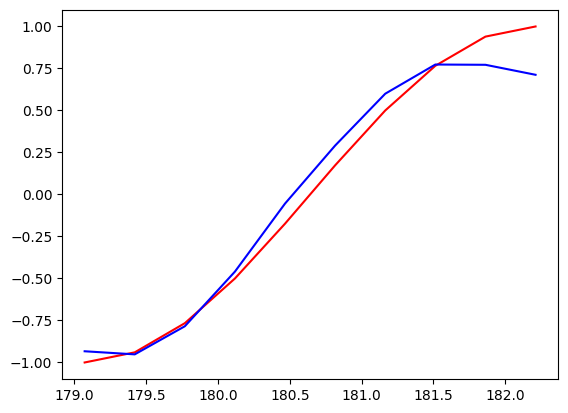

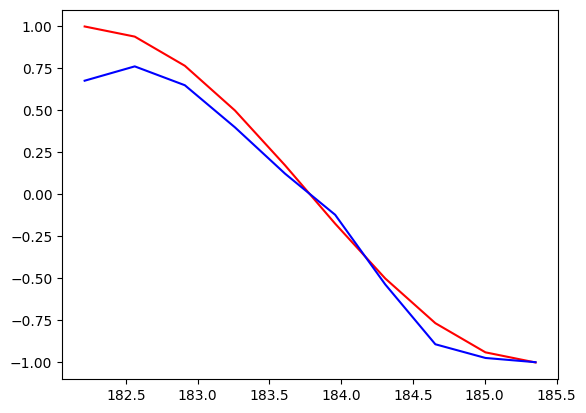

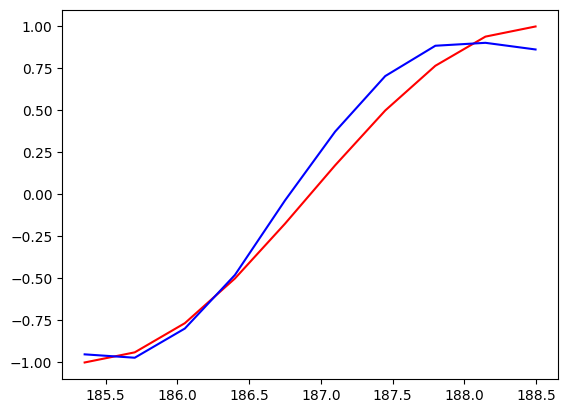

In [219]:
h_state = None # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()    # continuously plot

for step in range(60):
  start, end = step * np.pi, (step+1)*np.pi   # time range
  # use sin predicts cos
  steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
  x_np = np.sin(steps)
  y_np = np.cos(steps)

  x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
  # shape (batch, time_step, input_size)
  y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

  prediction, h_state = rnn(x, h_state)   # rnn output

  h_state = Variable(h_state.data)
  # repack the hidden state, break the connection from last iteration

  loss = loss_func(prediction, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # plotting
  plt.plot(steps, y_np.flatten(), 'r-')
  plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
  plt.draw(); plt.pause(0.05)